### Intracellular Ca signalling model

1. Markov state model was built based on "Allosteric Regulation of the P2X4 Recepter Channel Pore Dilation" by Zemkova, Khadra, Rokic, Tvrdonova, Sherman, and Stojikovic.

- This is the 13-state model

2. The relative contribution of Ca to total inward current in the cell (HEK293) was reported to be 8.24 +- 0.36% by Garcia-Guzman. -> This may need to be adjusted for rat P2X4 channel
3. The diameter of HEK293 cell body is approximated to be 13 microns -> r = 6.5 microns
4. The diameter of microglia cell body is approximated to be 5.2 microns -> r = 2.6 microns (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4213482/)
5. Beyond the buffering effects of calmodulin was handled by Rachel
6. The intermediate product of this code is "intracellular Ca transient"
7. The final outcome of this code is "TNF-alpha transient"

*1. Markov state model was built based on "Dual gating mechanism and function of P2X7 receptor channels" by Khadra and modified to adjust the current profile from the activation by BzATP to ATP. 

- This is the 12-state model
- BzATP = 4.11863563exp(ATP*0.00479906) 

#### Limitations & Assumptions

1. NFAT terms with no detail connection to buffering effects.

2. No TNF terms

#### NFATNn Profile & TNF-alpha release

1. Even after adjusting some of parameters, there is no supporting data to explain or indicating the scale of concentrations. 
2. The pattern of profile will be used as a switch of TNF-alpha release and the concentration of NFATNn will not influence on the degree of release
3. The release of TNF-alpha will be fully assumed based on general RNA transcription and translation. https://www.mathworks.com/help/simbio/gs/-model-a-gene-regulation-pathway.html?requestedDomain=true

In [1]:
# Function for integreating ODE and displaying results
import scipy.integrate
from scipy.integrate import odeint
import numpy as np
import matplotlib.pylab as plt
import math
from math import exp
from scipy.interpolate import spline
import pickle as pk
%matplotlib inline

# Importing the microglia related packages
import data_v3 as dt      # Data sorting code
import TNFa as ta      # TNFa release code
import NFAT as nt      # NFAT cycle code
import MSMp2x4 as p4   # Markov State Model for P2X4 channel
import MSMp2x7 as p7   # Markov State Model for P2X7 channel
import SBbuffers as bf # Buffers (Fura-2, Calmodulin, and Calsequestrin) code
import SERCAER as er   # SERCA Pump code
import NCX as nx       # Na/Ca exchanger code
import calculator_v5 as ca

import numpy.random as npr
# normal random distribution
from numpy.random import normal as nprn
# uniform random distribution
from numpy.random import uniform as npru

In [26]:
results1 = ca.total(1,2000,10,10,0.1)
pk.dump(results1,open("basal.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [3]:
results2 = ca.total(1,2000,10,10,10)
pk.dump(results2,open("001mMATP_01Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [4]:
results3 = ca.total(1,2000,10,10,100)
pk.dump(results3,open("01mMATP_01Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [5]:
results4 = ca.total(1,2000,10,10,200)
pk.dump(results4,open("02mMATP_01Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [6]:
results5 = ca.total(1,2000,10,10,500)
pk.dump(results5,open("05mMATP_01Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [7]:
results6 = ca.total(1,2000,10,10,1000)
pk.dump(results6,open("1mMATP_01Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [8]:
results7 = ca.total(1,10000,10,2,1000)
pk.dump(results7,open("1mMATP_05Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [9]:
results8 = ca.total(1,1000,10,20,1000)
pk.dump(results8,open("1mMATP_005Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [10]:
results9 = ca.total(1,200,10,100,1000)
pk.dump(results9,open("1mMATP_001Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [2]:
data1 = pk.load(open("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/Data/MG-p2x-CaMCN-v6/basal.p","rb"))
data2 = pk.load(open("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/Data/MG-p2x-CaMCN-v6/001mMATP_01Hz.p","rb"))
data3 = pk.load(open("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/Data/MG-p2x-CaMCN-v6/01mMATP_01Hz.p","rb"))
data4 = pk.load(open("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/Data/MG-p2x-CaMCN-v6/02mMATP_01Hz.p","rb"))
data5 = pk.load(open("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/Data/MG-p2x-CaMCN-v6/05mMATP_01Hz.p","rb"))
data6 = pk.load(open("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/Data/MG-p2x-CaMCN-v6/1mMATP_01Hz.p","rb"))
data7 = pk.load(open("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/Data/MG-p2x-CaMCN-v6/1mMATP_05Hz.p","rb"))
data8 = pk.load(open("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/Data/MG-p2x-CaMCN-v6/1mMATP_005Hz.p","rb"))
data9 = pk.load(open("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/Data/MG-p2x-CaMCN-v6/1mMATP_001Hz.p","rb"))

In [72]:
data6 = pk.load(open("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/Data/MG-p2x-CaMCN-v6/1mMATP_01Hz.p","rb"))

In [12]:
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data1
Ca1 = Cai
Ca2CaM1 = Ca2CaM
Ca4CaM1 = Ca4CaM
Ca4CN1 = Ca4CN
CaMCN1 = CaMCN
NFATNn1 = NFATNn
NFATpc1 = NFATpc
NFATpn1 = NFATpn
NFATNc1 = NFATNc
TNFa1 = TNFa
TNFa_leak1 = TNFa_leak
TNFa_release1 = TNFa_release
TNFa_release_total1 = TNFa_release_total
time1 = time

In [13]:
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data2
Ca2 = Cai
Ca2CaM2 = Ca2CaM
Ca4CaM2 = Ca4CaM
Ca4CN2 = Ca4CN
CaMCN2 = CaMCN
NFATNn2 = NFATNn
NFATpc2 = NFATpc
NFATpn2 = NFATpn
NFATNc2 = NFATNc
TNFa2 = TNFa
TNFa_leak2 = TNFa_leak
TNFa_release2 = TNFa_release
TNFa_release_total2 = TNFa_release_total
time2 = time

In [14]:
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data3
Ca3 = Cai
Ca2CaM3 = Ca2CaM
Ca4CaM3 = Ca4CaM
Ca4CN3 = Ca4CN
CaMCN3 = CaMCN
NFATNn3 = NFATNn
NFATpc3 = NFATpc
NFATpn3 = NFATpn
NFATNc3 = NFATNc
TNFa3 = TNFa
TNFa_leak3 = TNFa_leak
TNFa_release3 = TNFa_release
TNFa_release_total3 = TNFa_release_total
time3 = time

In [15]:
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data4
Ca4 = Cai
Ca2CaM4 = Ca2CaM
Ca4CaM4 = Ca4CaM
Ca4CN4 = Ca4CN
CaMCN4 = CaMCN
NFATNn4 = NFATNn
NFATpc4 = NFATpc
NFATpn4 = NFATpn
NFATNc4 = NFATNc
TNFa4 = TNFa
TNFa_leak4 = TNFa_leak
TNFa_release4 = TNFa_release
TNFa_release_total4 = TNFa_release_total
time4 = time

In [16]:
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data5
Ca5 = Cai
Ca2CaM5 = Ca2CaM
Ca4CaM5 = Ca4CaM
Ca4CN5 = Ca4CN
CaMCN5 = CaMCN
NFATNn5 = NFATNn
NFATpc5 = NFATpc
NFATpn5 = NFATpn
NFATNc5 = NFATNc
TNFa5 = TNFa
TNFa_leak5 = TNFa_leak
TNFa_release5 = TNFa_release
TNFa_release_total5 = TNFa_release_total
time5 = time

In [17]:
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data6
Ca6 = Cai
Ca2CaM6 = Ca2CaM
Ca4CaM6 = Ca4CaM
Ca4CN6 = Ca4CN
CaMCN6 = CaMCN
NFATNn6 = NFATNn
NFATpc6 = NFATpc
NFATpn6 = NFATpn
NFATNc6 = NFATNc
TNFa6 = TNFa
TNFa_leak6 = TNFa_leak
TNFa_release6 = TNFa_release
TNFa_release_total6 = TNFa_release_total
time6 = time

In [18]:
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data7
Ca7 = Cai
Ca2CaM7 = Ca2CaM
Ca4CaM7 = Ca4CaM
Ca4CN7 = Ca4CN
CaMCN7 = CaMCN
NFATNn7 = NFATNn
NFATpc7 = NFATpc
NFATpn7 = NFATpn
NFATNc7 = NFATNc
TNFa7 = TNFa
TNFa_leak7 = TNFa_leak
TNFa_release7 = TNFa_release
TNFa_release_total7 = TNFa_release_total
time7 = time

In [19]:
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data8
Ca8 = Cai
Ca2CaM8 = Ca2CaM
Ca4CaM8 = Ca4CaM
Ca4CN8 = Ca4CN
CaMCN8 = CaMCN
NFATNn8 = NFATNn
NFATpc8 = NFATpc
NFATpn8 = NFATpn
NFATNc8 = NFATNc
TNFa8 = TNFa
TNFa_leak8 = TNFa_leak
TNFa_release8 = TNFa_release
TNFa_release_total8 = TNFa_release_total
time8 = time

In [20]:
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data9
Ca9 = Cai
Ca2CaM9 = Ca2CaM
Ca4CaM9 = Ca4CaM
Ca4CN9 = Ca4CN
CaMCN9 = CaMCN
NFATNn9 = NFATNn
NFATpc9 = NFATpc
NFATpn9 = NFATpn
NFATNc9 = NFATNc
TNFa9 = TNFa
TNFa_leak9 = TNFa_leak
TNFa_release9 = TNFa_release
TNFa_release_total9 = TNFa_release_total
time9 = time

### ATP Stimulation indicator generation

In [11]:
# 1 sec of stimulation in 0.1 Hz
from numpy import ma
iters1 = np.arange(2000)
interval = 10
st = 1
ATP = []
timeATP = []
y = 0.6
dummy = np.nan
for i in iters1:
    ti = i*interval
    tf = (1+i)*interval-st
    trs = scipy.linspace(ti,tf,(interval*1))
    iters2 = np.arange(np.shape(trs)[0])
    for j in iters2:
        ATP = np.append(ATP,dummy)
    tst=scipy.linspace(tf,(tf+st),(st*2))
    iters3 = np.arange(np.shape(tst)[0])
    for k in iters3:
        ATP = np.append(ATP,0.5)
    timeATP = np.append(timeATP,trs)
    timeATP = np.append(timeATP,tst)
    
    
# 1 sec of stimulation in 0.5 Hz
# 1 sec of stimulation in 0.05 Hz
# 1 sec of stimulation in 0.01 Hz 

### Various ATP condition and Ca transients at 0.1 Hz

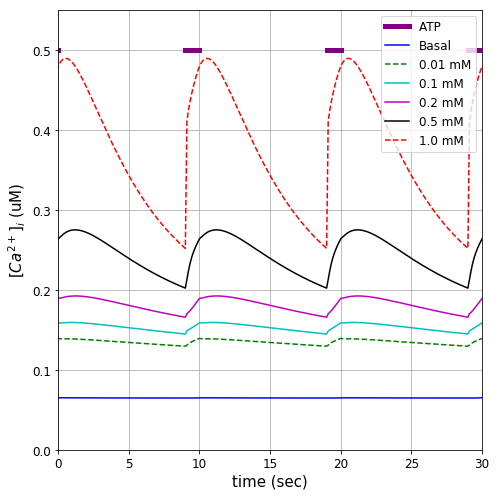

In [35]:
t_int = 30
t_end = 20000
t_new = t_end-t_int
plt.figure(figsize = (7,7))
plt.tick_params(labelsize=12)
plt.plot((timeATP-t_new),ATP,'purple',label='ATP',linewidth=5)
plt.plot((time1-t_new),Ca1*10**6,'b-',label="Basal")
plt.plot((time2-t_new),Ca2*10**6,'g--',label="0.01 mM")
plt.plot((time3-t_new),Ca3*10**6,'c-',label="0.1 mM")
plt.plot((time4-t_new),Ca4*10**6,'m-',label="0.2 mM")
plt.plot((time5-t_new),Ca5*10**6,'k-',label="0.5 mM")
plt.plot((time6-t_new),Ca6*10**6,'r--',label="1.0 mM")
plt.xlabel("time (sec)",fontsize=15)
plt.ylabel("$[Ca^{2+}]_{i}$ (uM)",fontsize=15)
plt.legend(loc=0,fontsize=12)
plt.xlim(0,t_int)
plt.ylim(0.0,0.55)
plt.tight_layout()
plt.grid(True)
plt.savefig('CaTransient.png')

### Various ATP concentrations and CaM-CN concentrations at 0.1 Hz

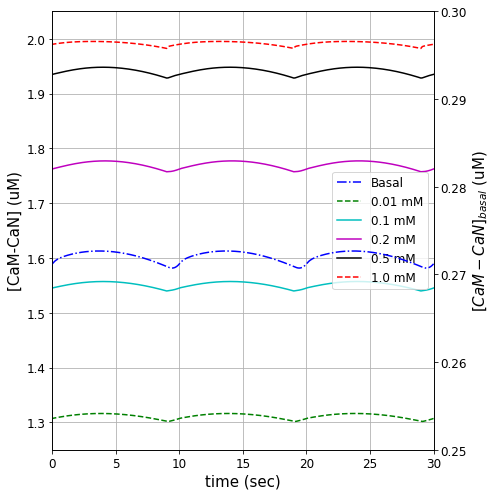

In [70]:
t_int = 30
t_end = 20000
t_new = t_end-t_int

plt.figure(figsize = (7,7))
ax = plt.subplot()
ax2 = ax.twinx()
ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)

l1 = ax2.plot(time1-t_new,CaMCN1*10**6,'b-.',label="Basal")
l2 = ax.plot(time2-t_new,CaMCN2*10**6,'g--',label="0.01 mM")
l3 = ax.plot(time3-t_new,CaMCN3*10**6,'c-',label="0.1 mM")
l4 = ax.plot(time4-t_new,CaMCN4*10**6,'m-',label="0.2 mM")
l5 = ax.plot(time5-t_new,CaMCN5*10**6,'k-',label="0.5 mM")
l6 = ax.plot(time6-t_new,CaMCN6*10**6,'r--',label="1.0 mM")

ax.set_xlabel("time (sec)",fontsize=15)
ax.set_ylabel("[CaM-CaN] (uM)",fontsize=15)
ax2.set_ylabel("$[CaM-CaN]_{basal}$ (uM)",fontsize=15)
ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
lns = l1 + l2 + l3 + l4 + l5 + l6
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc=0, fontsize=12)
ax.grid(True)
ax.set_ylim(1.25,2.05)
ax2.set_ylim(0.25,0.3)
ax.set_xlim(0,t_int)

ax.grid(True)
plt.tight_layout()

plt.savefig('CaMCN.png')

### Various ATP concentrations and NFAT at 0.1 Hz

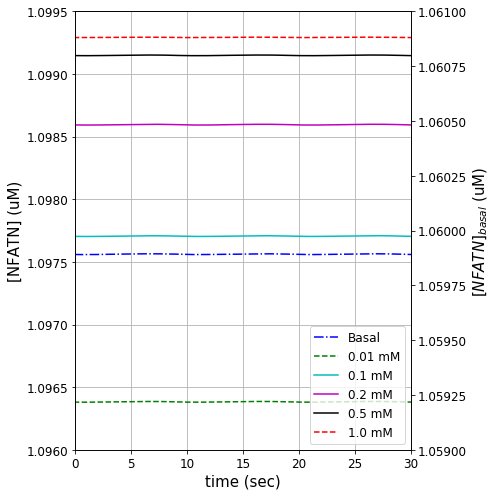

In [94]:
t_int = 30
t_end = 20000
t_new = t_end-t_int

plt.figure(figsize = (7,7))
ax = plt.subplot()
ax2 = ax.twinx()
ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)

l1 = ax2.plot(time1-t_new,NFATNn1,'b-.',label="Basal")
l2 = ax.plot(time2-t_new,NFATNn2,'g--',label="0.01 mM")
l3 = ax.plot(time3-t_new,NFATNn3,'c-',label="0.1 mM")
l4 = ax.plot(time4-t_new,NFATNn4,'m-',label="0.2 mM")
l5 = ax.plot(time5-t_new,NFATNn5,'k-',label="0.5 mM")
l6 = ax.plot(time6-t_new,NFATNn6,'r--',label="1.0 mM")

ax.set_xlabel("time (sec)",fontsize=15)
ax.set_ylabel("[NFATN] (uM)",fontsize=15)
ax2.set_ylabel("$[NFATN]_{basal}$ (uM)",fontsize=15)
ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
lns = l1 + l2 + l3 + l4 + l5 + l6
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc=0, fontsize=12)
ax.grid(True)
ax.set_ylim(1.096,1.0995)
ax2.set_ylim(1.059,1.061)
ax.set_xlim(0,t_int)

ax.grid(True)
plt.tight_layout()
plt.savefig('NFATATP.png')

### Various ATP concentrations and TNFa release at 0.1 Hz

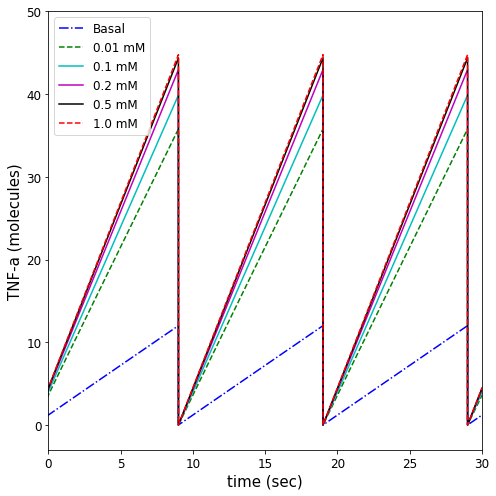

In [24]:
plt.figure(figsize = (7,7))
plt.tick_params(labelsize=12)
plt.plot(time1-t_new,TNFa_release_total1,'b-.',label="Basal")
plt.plot(time2-t_new,TNFa_release_total2,'g--',label="0.01 mM")
plt.plot(time3-t_new,TNFa_release_total3,'c-',label="0.1 mM")
plt.plot(time4-t_new,TNFa_release_total4,'m-',label="0.2 mM")
plt.plot(time5-t_new,TNFa_release_total5,'k-',label="0.5 mM")
plt.plot(time6-t_new,TNFa_release_total6,'r--',label="1.0 mM")
plt.xlabel("time (sec)",fontsize=15)
plt.ylabel('TNF-a (molecules)',fontsize=15)
plt.legend(loc=0,fontsize=12)
plt.xlim(0,t_int)
plt.ylim(-3,50)
plt.tight_layout()

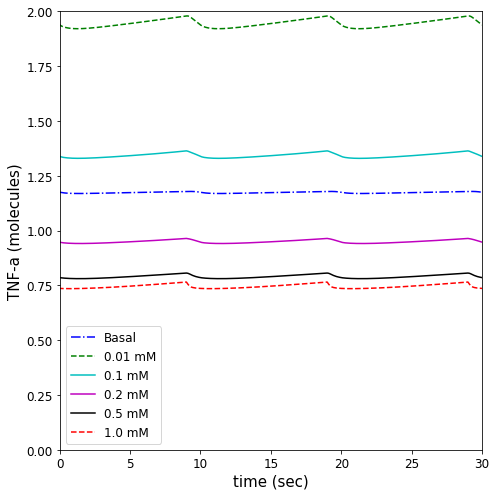

In [23]:
t_int = 30
t_end = 20000
t_new = t_end-t_int
plt.figure(figsize = (7,7))
plt.tick_params(labelsize=12)
plt.plot(time1-t_new,TNFa1,'b-.',label="Basal")
plt.plot(time2-t_new,TNFa2,'g--',label="0.01 mM")
plt.plot(time3-t_new,TNFa3,'c-',label="0.1 mM")
plt.plot(time4-t_new,TNFa4,'m-',label="0.2 mM")
plt.plot(time5-t_new,TNFa5,'k-',label="0.5 mM")
plt.plot(time6-t_new,TNFa6,'r--',label="1.0 mM")
plt.xlabel("time (sec)",fontsize=15)
plt.ylabel('TNF-a (molecules)',fontsize=15)
plt.legend(loc=0,fontsize=12)
plt.ylim(0,2)
plt.xlim(0,t_int)
plt.tight_layout()

In [25]:
iters1 = np.arange(np.shape(time1)[0])
D1 = []
D2 = []
D3 = []
D4 = []
D5 = []
D6 = []

k = 0

for i in iters1:
    t = time1[i]
    if t > t_new and t <= t_end:
        k = k + 1
        d1 = np.array([Ca1[i],Ca2CaM1[i],Ca4CaM1[i],Ca4CN1[i],CaMCN1[i],
                       NFATNn1[i],TNFa_leak1[i],TNFa_release1[i],TNFa_release_total1[i],time1[i]-t_new])
        d2 = np.array([Ca2[i],Ca2CaM2[i],Ca4CaM2[i],Ca4CN2[i],CaMCN2[i],
                       NFATNn2[i],TNFa_leak2[i],TNFa_release2[i],TNFa_release_total2[i],time2[i]-t_new])
        d3 = np.array([Ca3[i],Ca2CaM3[i],Ca4CaM3[i],Ca4CN3[i],CaMCN3[i],
                       NFATNn3[i],TNFa_leak3[i],TNFa_release3[i],TNFa_release_total3[i],time3[i]-t_new])
        d4 = np.array([Ca4[i],Ca2CaM4[i],Ca4CaM4[i],Ca4CN4[i],CaMCN4[i],
                       NFATNn4[i],TNFa_leak4[i],TNFa_release4[i],TNFa_release_total4[i],time4[i]-t_new])
        d5 = np.array([Ca5[i],Ca2CaM5[i],Ca4CaM5[i],Ca4CN5[i],CaMCN5[i],
                       NFATNn5[i],TNFa_leak5[i],TNFa_release5[i],TNFa_release_total5[i],time5[i]-t_new])
        d6 = np.array([Ca6[i],Ca2CaM6[i],Ca4CaM6[i],Ca4CN6[i],CaMCN6[i],
                       NFATNn6[i],TNFa_leak6[i],TNFa_release6[i],TNFa_release_total6[i],time6[i]-t_new])
        
        if k == 1:
            D1 = d1
            D2 = d2
            D3 = d3
            D4 = d4
            D5 = d5
            D6 = d6
        else:
            D1 = np.vstack((D1,d1))
            D2 = np.vstack((D2,d2))
            D3 = np.vstack((D3,d3))
            D4 = np.vstack((D4,d4))
            D5 = np.vstack((D5,d5))
            D6 = np.vstack((D6,d6))
            
Camax = np.array([max(D1[:,0]),max(D2[:,0]),max(D3[:,0]),max(D4[:,0]),max(D5[:,0]),max(D6[:,0])])
CaMAX = max(Camax)
Camin = np.array([min(D1[:,0]),min(D2[:,0]),min(D3[:,0]),min(D4[:,0]),min(D5[:,0]),min(D6[:,0])]) 
deltaCa = np.array([D1[:,0]-Camin[0],D2[:,0]-Camin[1],D3[:,0]-Camin[2],D4[:,0]-Camin[3],D5[:,0]-Camin[4],D6[:,0]-Camin[5]])
rCa = Camax/CaMAX*100

CaMCNmax = np.array([max(D1[:,4]),max(D2[:,4]),max(D3[:,4]),max(D4[:,4]),max(D5[:,4]),max(D6[:,4])])
CaMCNMAX = max(CaMCNmax)
rCaMCN = CaMCNmax/CaMCNMAX*100

NFATmax = np.array([max(D1[:,5]),max(D2[:,5]),max(D3[:,5]),max(D4[:,5]),max(D5[:,5]),max(D6[:,5])])
NFATMAX = max(NFATmax)
rNFAT = NFATmax/NFATMAX*100
TNFleakmax = np.array([max(D1[:,6]),max(D2[:,6]),max(D3[:,6]),max(D4[:,6]),max(D5[:,6]),max(D6[:,6])])
TNFleakMAX = max(TNFleakmax)
rTNFleak = TNFleakmax/TNFleakMAX*100
TNFrelmax = np.array([max(D1[:,7]),max(D2[:,7]),max(D3[:,7]),max(D4[:,7]),max(D5[:,7]),max(D6[:,7])])
TNFrelMAX = max(TNFrelmax)
rTNFrel = TNFrelmax/TNFrelMAX*100
TNFrelTmax = np.array([max(D1[:,8]),max(D2[:,8]),max(D3[:,8]),max(D4[:,8]),max(D5[:,8]),max(D6[:,8])])
TNFrelTMAX = max(TNFrelTmax)
rTNFrelT = TNFrelTmax/TNFrelTMAX*100
rTNFlr = np.array([TNFleakmax[0]/TNFrelTMAX*100,
                  TNFleakmax[1]/TNFrelTMAX*100,
                  TNFleakmax[2]/TNFrelTMAX*100,
                  TNFleakmax[3]/TNFrelTMAX*100,
                  TNFleakmax[4]/TNFrelTMAX*100,
                  TNFleakmax[5]/TNFrelTMAX*100,])
rTNFrr = np.array([TNFrelmax[0]/TNFrelTMAX*100,
                  TNFrelmax[1]/TNFrelTMAX*100,
                  TNFrelmax[2]/TNFrelTMAX*100,
                  TNFrelmax[3]/TNFrelTMAX*100,
                  TNFrelmax[4]/TNFrelTMAX*100,
                  TNFrelmax[5]/TNFrelTMAX*100,])

In [244]:
#data6 = pk.load(open("1mMATP_01Hz.p","rb"))
#data7 = pk.load(open("1mMATP_05Hz.p","rb"))
#data8 = pk.load(open("1mMATP_005Hz.p","rb"))
#data9 = pk.load(open("1mMATP_001Hz.p","rb"))

iters6 = np.arange(np.shape(time6)[0])
iters7 = np.arange(np.shape(time7)[0])
iters8 = np.arange(np.shape(time8)[0])
iters9 = np.arange(np.shape(time9)[0])

t_int = 1000
t_end = 20000
t_new = t_end-t_int

l = 0
k = 0
w = 0
r = 0

for i in iters6:
    t = time6[i]
    if t > t_new and t <= t_end:
        l = l + 1
        d6 = np.array([Ca6[i],Ca2CaM6[i],Ca4CaM6[i],Ca4CN6[i],CaMCN6[i],
                       NFATNn6[i],TNFa_leak6[i],TNFa_release6[i],TNFa_release_total6[i],time6[i]-t_new])
        if l == 1:
            D6 = d6
        else:
            D6 = np.vstack((D6,d6))


for i in iters7:
    t = time7[i]
    if t > t_new and t <= t_end:
        k = k + 1
        d7 = np.array([Ca7[i],Ca2CaM7[i],Ca4CaM7[i],Ca4CN7[i],CaMCN7[i],
                       NFATNn7[i],TNFa_leak7[i],TNFa_release7[i],TNFa_release_total7[i],time7[i]-t_new])       
        if k == 1 :
            D7 = d7
        else:
            D7 = np.vstack((D7,d7))
    
        
for i in iters8:
    t = time8[i]
    if t > t_new and t <= t_end:
        w = w + 1
        d8 = np.array([Ca8[i],Ca2CaM8[i],Ca4CaM8[i],Ca4CN8[i],CaMCN8[i],
                       NFATNn8[i],TNFa_leak8[i],TNFa_release8[i],TNFa_release_total8[i],time8[i]-t_new])
        if w == 1 :
            D8 = d8
        else:
            D8 = np.vstack((D8,d8))

            
for i in iters9:
    t = time9[i]
    if t > t_new and t <= t_end:
        r = r + 1
        d9 = np.array([Ca9[i],Ca2CaM9[i],Ca4CaM9[i],Ca4CN9[i],CaMCN9[i],
                       NFATNn9[i],TNFa_leak9[i],TNFa_release9[i],TNFa_release_total9[i],time9[i]-t_new])
        if r == 1 :
            D9 = d9
        else:
            D9 = np.vstack((D9,d9))

            
Camax = np.array([max(D6[:,0]),max(D7[:,0]),max(D8[:,0]),max(D9[:,0])])
CaMAX = max(Camax)
rCaf = Camax/CaMAX*100

CaMCNmax = np.array([max(D6[:,4]),max(D7[:,4]),max(D8[:,4]),max(D9[:,4])])
CaMCNMAX = max(CaMCNmax)
rCaMCNf = CaMCNmax/CaMCNMAX*100

NFATmax = np.array([max(D6[:,5]),max(D7[:,5]),max(D8[:,5]),max(D9[:,5])])
NFATMAX = max(NFATmax)
rNFATf = NFATmax/NFATMAX*100

TNFleakmax = np.array([max(D6[:,6]),max(D7[:,6]),max(D8[:,6]),max(D9[:,6])])
TNFleakMAX = max(TNFleakmax)
rTNFleakf = TNFleakmax/TNFleakMAX*100

TNFrelmax = np.array([max(D6[:,7]),max(D7[:,7]),max(D8[:,7]),max(D9[:,7])])
TNFrelMAX = max(TNFrelmax)
rTNFrelf = TNFrelmax/TNFrelMAX*100

TNFrelTmax = np.array([max(D6[:,8]),max(D7[:,8]),max(D8[:,8]),max(D9[:,8])])
TNFrelTMAX = max(TNFrelTmax)
rTNFrelTf = TNFrelTmax/TNFrelTMAX*100

rTNFlrf = np.array([TNFleakmax[0]/TNFrelTMAX*100,
                  TNFleakmax[1]/TNFrelTMAX*100,
                  TNFleakmax[2]/TNFrelTMAX*100,
                  TNFleakmax[3]/TNFrelTMAX*100])
rTNFrrf = np.array([TNFrelmax[0]/TNFrelTMAX*100,
                  TNFrelmax[1]/TNFrelTMAX*100,
                  TNFrelmax[2]/TNFrelTMAX*100,
                  TNFrelmax[3]/TNFrelTMAX*100])

In [245]:
print(CaMCNmax*10**6)
print(Camax*10**6)

[ 1.9952059   1.8992254   1.99333734  1.9867596 ]
[ 0.4894769   0.21587335  0.58952905  0.7219199 ]


### Correlation between TNFa release and NFATNn at 0.1 Hz

/home/AD/bch265/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


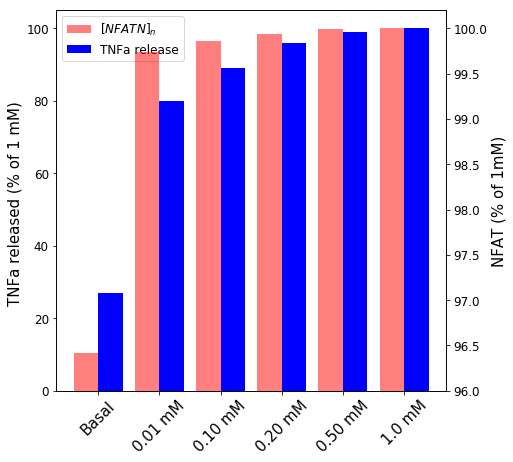

In [42]:
plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
ax = plt.subplot()
ax2 = ax.twinx()
b1 = ax2.bar(1-0.2,rNFAT[0],0.4,color="red",alpha=0.5)
b2 = ax.bar(1+0.2,rTNFrelT[0],0.4,color="blue",alpha=1)
b3 = ax2.bar(2-0.2,rNFAT[1],0.4,color="red",alpha=0.5)
b4 = ax.bar(2+0.2,rTNFrelT[1],0.4,color="blue",alpha=1)
b5 = ax2.bar(3-0.2,rNFAT[2],0.4,color="red",alpha=0.5)
b6 = ax.bar(3+0.2,rTNFrelT[2],0.4,color="blue",alpha=1)
b7 = ax2.bar(4-0.2,rNFAT[3],0.4,color="red",alpha=0.5)
b8 = ax.bar(4+0.2,rTNFrelT[3],0.4,color="blue",alpha=1)
b9 = ax2.bar(5-0.2,rNFAT[4],0.4,color="red",alpha=0.5)
b10 = ax.bar(5+0.2,rTNFrelT[4],0.4,color="blue",alpha=1)
b11 = ax2.bar(6-0.2,rNFAT[5],0.4,color="red",alpha=0.5)
b12 = ax.bar(6+0.2,rTNFrelT[5],0.4,color="blue",alpha=1)

ax.set_ylabel("TNFa released (% of 1 mM) ",fontsize=15)
ax2.set_ylabel('NFAT (% of 1mM)',fontsize=15)
ax.legend((b1[0],b2[0]),('$[NFATN]_{n}$','TNFa release'),loc=0,fontsize=12)
newInd = np.array([1,2,3,4,5,6])
ax2.set_ylim(96,100.2)
ax2.tick_params(labelsize=12)
ax.set_xticks(newInd)
ax.set_xticklabels(['Basal','0.01 mM','0.10 mM','0.20 mM\n','0.50 mM','1.0 mM'],rotation=45,fontsize=15)
plt.savefig("NFATvsTNFwrtATP.png")

### ATP vs relative TNFa release at 0.1 Hz - decomposed 

/home/AD/bch265/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


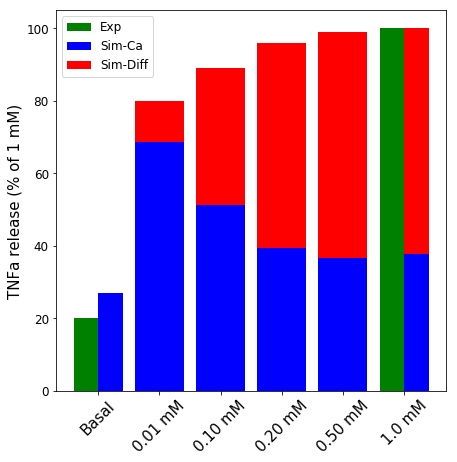

In [109]:
expTNFa = np.array([20,100])    

plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
ax = plt.subplot()
b1 = ax.bar(1-0.2,expTNFa[0],0.4,color="green",alpha=1)
b2 = ax.bar(1+0.2,rTNFlr[0],0.4,color="blue",alpha=1)
b3 = ax.bar(1+0.2,rTNFrr[0],0.4,color="red",alpha=1, bottom=rTNFlr[0])
b4 = ax.bar(2,rTNFlr[1],0.8,color="blue",alpha=1)
b5 = ax.bar(2,rTNFrr[1],0.8,color="red",alpha=1, bottom=rTNFlr[1])
b6 = ax.bar(3,rTNFlr[2],0.8,color="blue",alpha=1)
b7 = ax.bar(3,rTNFrr[2],0.8,color="red",alpha=1, bottom=rTNFlr[2])
b8 = ax.bar(4,rTNFlr[3],0.8,color="blue",alpha=1)
b9 = ax.bar(4,rTNFrr[3],0.8,color="red",alpha=1, bottom=rTNFlr[3])
b10 = ax.bar(5,rTNFlr[4],0.8,color="blue",alpha=1)
b11 = ax.bar(5,rTNFrr[4],0.8,color="red",alpha=1, bottom=rTNFlr[4])
b12 = ax.bar(6-0.2,expTNFa[1],0.4,color="green",alpha=1)
b13 = ax.bar(6+0.2,rTNFlr[5],0.4,color="blue",alpha=1)
b14 = ax.bar(6+0.2,rTNFrr[5],0.4,color="red",alpha=1, bottom=rTNFlr[5])

ax.set_ylabel("TNFa release (% of 1 mM)",fontsize=15)
ax.legend((b1[0],b2[0],b3[0]),('Exp','Sim-Ca','Sim-Diff'),fontsize=12)
newInd = np.array([1,2,3,4,5,6])
ax.set_xticks(newInd)
ax.set_xticklabels(['Basal','0.01 mM','0.10 mM','0.20 mM','0.50 mM','1.0 mM'],rotation=45,fontsize=15)
plt.savefig('ATPvsTNF_decomp.png')

### ATP vs relative TNFa release at 0.1 Hz

/home/AD/bch265/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


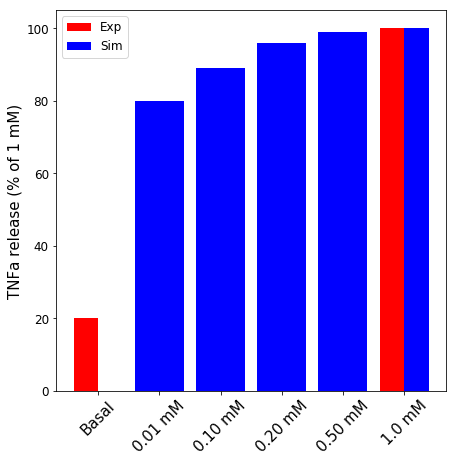

In [38]:
expTNFa = np.array([20,100])    

plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
ax = plt.subplot()
b1 = ax.bar(1-0.2,expTNFa[0],0.4,color="red",alpha=1)
b2 = ax.bar(1+0.2,rTNFrelT[0],0.4,color="blue",alpha=1)
b4 = ax.bar(2,rTNFrelT[1],0.8,color="blue",alpha=1)
b6 = ax.bar(3,rTNFrelT[2],0.8,color="blue",alpha=1)
b8 = ax.bar(4,rTNFrelT[3],0.8,color="blue",alpha=1)
b10 = ax.bar(5,rTNFrelT[4],0.8,color="blue",alpha=1)
b12 = ax.bar(6-0.2,expTNFa[1],0.4,color="red",alpha=1)
b13 = ax.bar(6+0.2,rTNFrelT[5],0.4,color="blue",alpha=1)

ax.set_ylabel("TNFa release (% of 1 mM)",fontsize=15)
ax.legend((b1[0],b2[0]),('Exp','Sim'),fontsize=12)
newInd = np.array([1,2,3,4,5,6])
ax.set_xticks(newInd)
ax.set_xticklabels(['Basal','0.01 mM','0.10 mM','0.20 mM','0.50 mM','1.0 mM'],rotation=45,fontsize=15)
plt.savefig('ATPvsTNF.png')

/home/AD/bch265/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


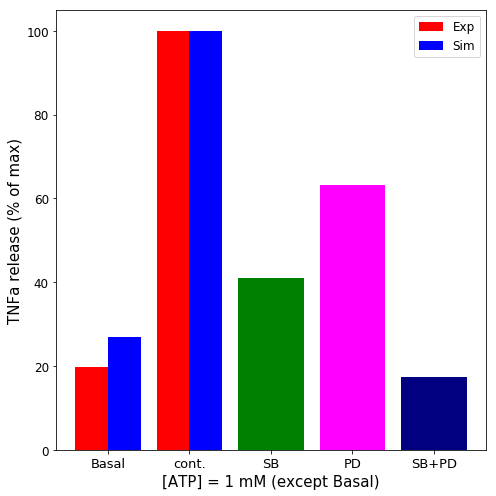

In [206]:
plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
ax = plt.subplot()
b1 = ax.bar(1-0.2,19.74,0.4,color="red",alpha=1)
b2 = ax.bar(1+0.2,rTNFrelT[0],0.4,color="blue",alpha=1)
b3 = ax.bar(2-0.2,100,0.4,color="red",alpha=1)
b4 = ax.bar(2+0.2,rTNFrelT[5],0.4,color="blue",alpha=1)
b5 = ax.bar(3,41.0389,0.8,color="green",alpha=1)
b6 = ax.bar(4,63.11688,0.8,color="magenta",alpha=1)
b7 = ax.bar(5,17.4025974,0.8,color="navy",alpha=1)

ax.set_ylabel("TNFa release (% of max)",fontsize=15)
ax.legend((b1[0],b2[0]),('Exp','Sim'),fontsize=12)
newInd = np.array([1,2,3,4,5])
ax.set_xticks(newInd)
ax.set_xticklabels(['Basal','cont.','SB','PD','SB+PD'],fontsize=13)
ax.set_xlabel("[ATP] = 1 mM (except Basal)",horizontalalignment='center',fontsize=15)
plt.tight_layout()
plt.savefig('inhibitorvsTNF.png')

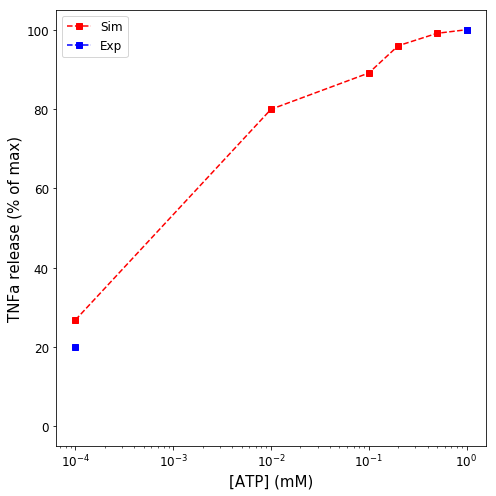

In [205]:
ATP = np.array([0.1, 10, 100, 200, 500, 1000])/1000 
expTNFa = np.array([20,np.nan,np.nan,np.nan,np.nan,100])    
p38inhibited = 41.03
p38ATP = 1000/1000
plt.figure(figsize = (7,7))
plt.tick_params(labelsize=12)
plt.semilogx(ATP,rTNFrelT,'r--s',label="Sim")
plt.semilogx(ATP,expTNFa,'b--s',label="Exp")
#plt.semilogx(p38ATP,41.03,'k--s',label="Exp-inhibited p38")
plt.xlabel("[ATP] (mM)",fontsize=15)
plt.ylabel("TNFa release (% of max)",fontsize=15)
plt.legend(loc=0,fontsize=12)
plt.ylim(-5,105)
plt.tight_layout()
plt.savefig('ampTNFasemilogx.png')

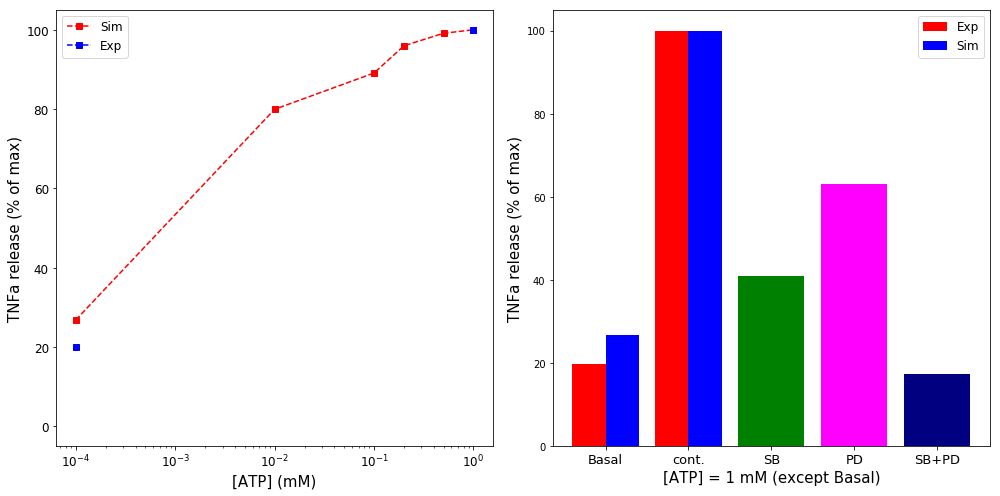

In [209]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
ATP = np.array([0.1, 10, 100, 200, 500, 1000])/1000 
expTNFa = np.array([20,np.nan,np.nan,np.nan,np.nan,100])    
p38inhibited = 41.03
p38ATP = 1000/1000
plt.tick_params(labelsize=12)
plt.semilogx(ATP,rTNFrelT,'r--s',label="Sim")
plt.semilogx(ATP,expTNFa,'b--s',label="Exp")
#plt.semilogx(p38ATP,41.03,'k--s',label="Exp-inhibited p38")
plt.xlabel("[ATP] (mM)",fontsize=15)
plt.ylabel("TNFa release (% of max)",fontsize=15)
plt.legend(loc=0,fontsize=12)
plt.ylim(-5,105)
plt.tight_layout()
#plt.savefig('ampTNFasemilogx.png')

plt.tick_params(labelsize=12)
ax = plt.subplot(1,2,2)
b1 = ax.bar(1-0.2,19.74,0.4,color="red",alpha=1)
b2 = ax.bar(1+0.2,rTNFrelT[0],0.4,color="blue",alpha=1)
b3 = ax.bar(2-0.2,100,0.4,color="red",alpha=1)
b4 = ax.bar(2+0.2,rTNFrelT[5],0.4,color="blue",alpha=1)
b5 = ax.bar(3,41.0389,0.8,color="green",alpha=1)
b6 = ax.bar(4,63.11688,0.8,color="magenta",alpha=1)
b7 = ax.bar(5,17.4025974,0.8,color="navy",alpha=1)

ax.set_ylabel("TNFa release (% of max)",fontsize=15)
ax.legend((b1[0],b2[0]),('Exp','Sim'),fontsize=12)
newInd = np.array([1,2,3,4,5])
ax.set_xticks(newInd)
ax.set_xticklabels(['Basal','cont.','SB','PD','SB+PD'],fontsize=13)
ax.set_xlabel("[ATP] = 1 mM (except Basal)",horizontalalignment='center',fontsize=15)
plt.tight_layout()
plt.savefig('inhibitorvsTNFandampTNFa.png')

### Relative TNFa release with respect to various ATP concentrations (1 hr stimulation within cycle of 5000 seconds)

In [2]:
results21 = ca.total(3600,20,10,20000,0.1)
pk.dump(results21,open("basal1hr000005Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [3]:
data21 = pk.load(open("basal1hr000005Hz.p","rb"))
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data21
Ca21 = Cai
Ca2CaM21 = Ca2CaM
Ca4CaM21 = Ca4CaM
Ca4CN21 = Ca4CN
CaMCN21 = CaMCN
NFATNn21 = NFATNn
TNFa_leak21 = TNFa_leak
TNFa_release21 = TNFa_release
TNFa_release_total21 = TNFa_release_total
time21 = time

In [4]:
results22 = ca.total(3600,20,10,20000,10)
pk.dump(results22,open("001mM1hr000005Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [5]:
data22 = pk.load(open("001mM1hr000005Hz.p","rb"))
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data22
Ca22 = Cai
Ca2CaM22 = Ca2CaM
Ca4CaM22 = Ca4CaM
Ca4CN22 = Ca4CN
CaMCN22 = CaMCN
NFATNn22 = NFATNn
TNFa_leak22 = TNFa_leak
TNFa_release22 = TNFa_release
TNFa_release_total22 = TNFa_release_total
time22 = time

In [6]:
results23 = ca.total(3600,20,10,20000,100)
pk.dump(results23,open("01mM1hr000005Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [7]:
data23 = pk.load(open("01mM1hr000005Hz.p","rb"))
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data23
Ca23 = Cai
Ca2CaM23 = Ca2CaM
Ca4CaM23 = Ca4CaM
Ca4CN23 = Ca4CN
CaMCN23 = CaMCN
NFATNn23 = NFATNn
TNFa_leak23 = TNFa_leak
TNFa_release23 = TNFa_release
TNFa_release_total23 = TNFa_release_total
time23 = time

In [8]:
results24 = ca.total(3600,20,10,20000,200)
pk.dump(results24,open("02mM1hr000005Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [9]:
data24 = pk.load(open("02mM1hr000005Hz.p","rb"))
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data24
Ca24 = Cai
Ca2CaM24 = Ca2CaM
Ca4CaM24 = Ca4CaM
Ca4CN24 = Ca4CN
CaMCN24 = CaMCN
NFATNn24 = NFATNn
TNFa_leak24 = TNFa_leak
TNFa_release24 = TNFa_release
TNFa_release_total24 = TNFa_release_total
time24 = time

In [10]:
results25 = ca.total(3600,20,10,20000,500)
pk.dump(results25,open("05mM1hr000005Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [ ]:
data25 = pk.load(open("05mM1hr000005Hz.p","rb"))
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data25
Ca25 = Cai
Ca2CaM25 = Ca2CaM
Ca4CaM25 = Ca4CaM
Ca4CN25 = Ca4CN
CaMCN25 = CaMCN
NFATNn25 = NFATNn
TNFa_leak25 = TNFa_leak
TNFa_release25 = TNFa_release
TNFa_release_total25 = TNFa_release_total
time25 = time

In [ ]:
results26 = ca.total(3600,20,10,20000,1000)
pk.dump(results26,open("1mM1hr000005Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [ ]:
data26 = pk.load(open("1mM1hr000005Hz.p","rb"))
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data26
Ca26 = Cai
Ca2CaM26 = Ca2CaM
Ca4CaM26 = Ca4CaM
Ca4CN26 = Ca4CN
CaMCN26 = CaMCN
NFATNn26 = NFATNn
TNFa_leak26 = TNFa_leak
TNFa_release26 = TNFa_release
TNFa_release_total26 = TNFa_release_total
time26 = time

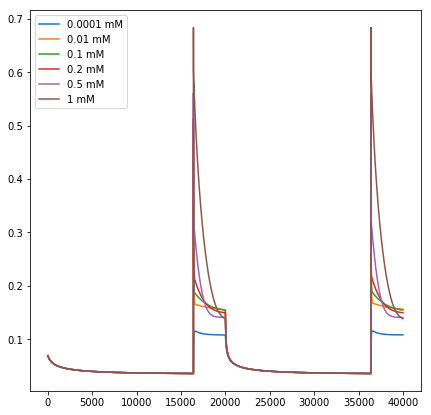

In [120]:
plt.figure(figsize = (7,7)) # w/ 20000
plt.plot(time21,Ca21*10**6,label='0.0001 mM')
plt.plot(time22,Ca22*10**6,label='0.01 mM')
plt.plot(time23,Ca23*10**6,label='0.1 mM')
plt.plot(time24,Ca24*10**6,label='0.2 mM')
plt.plot(time25,Ca25*10**6,label='0.5 mM')
plt.plot(time26,Ca26*10**6,label='1 mM')
plt.legend(loc=0)
#plt.xlim(175000,200000)

In [66]:
results21 = ca.total(1,10,10,1000,0.1)
pk.dump(results21,open("basal1sec0001Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [67]:
data21 = pk.load(open("basal1sec0001Hz.p","rb"))
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data21
Ca21 = Cai
Ca2CaM21 = Ca2CaM
Ca4CaM21 = Ca4CaM
Ca4CN21 = Ca4CN
CaMCN21 = CaMCN
NFATNn21 = NFATNn
TNFa_leak21 = TNFa_leak
TNFa_release21 = TNFa_release
TNFa_release_total21 = TNFa_release_total
time21 = time

In [68]:
results22 = ca.total(1,10,10,1000,10)
pk.dump(results22,open("001mM1sec0001Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [69]:
data22 = pk.load(open("001mM1sec0001Hz.p","rb"))
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data22
Ca22 = Cai
Ca2CaM22 = Ca2CaM
Ca4CaM22 = Ca4CaM
Ca4CN22 = Ca4CN
CaMCN22 = CaMCN
NFATNn22 = NFATNn
TNFa_leak22 = TNFa_leak
TNFa_release22 = TNFa_release
TNFa_release_total22 = TNFa_release_total
time22 = time

In [70]:
results23 = ca.total(1,10,10,1000,100)
pk.dump(results23,open("01mM1sec0001Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [71]:
data23 = pk.load(open("01mM1sec0001Hz.p","rb"))
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data23
Ca23 = Cai
Ca2CaM23 = Ca2CaM
Ca4CaM23 = Ca4CaM
Ca4CN23 = Ca4CN
CaMCN23 = CaMCN
NFATNn23 = NFATNn
TNFa_leak23 = TNFa_leak
TNFa_release23 = TNFa_release
TNFa_release_total23 = TNFa_release_total
time23 = time

In [72]:
results24 = ca.total(1,10,10,1000,200)
pk.dump(results24,open("02mM1sec0001Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [73]:
data24 = pk.load(open("02mM1sec0001Hz.p","rb"))
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data24
Ca24 = Cai
Ca2CaM24 = Ca2CaM
Ca4CaM24 = Ca4CaM
Ca4CN24 = Ca4CN
CaMCN24 = CaMCN
NFATNn24 = NFATNn
TNFa_leak24 = TNFa_leak
TNFa_release24 = TNFa_release
TNFa_release_total24 = TNFa_release_total
time24 = time

In [74]:
results25 = ca.total(1,10,10,1000,500)
pk.dump(results25,open("05mM1sec0001Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [75]:
data25 = pk.load(open("05mM1sec0001Hz.p","rb"))
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data25
Ca25 = Cai
Ca2CaM25 = Ca2CaM
Ca4CaM25 = Ca4CaM
Ca4CN25 = Ca4CN
CaMCN25 = CaMCN
NFATNn25 = NFATNn
TNFa_leak25 = TNFa_leak
TNFa_release25 = TNFa_release
TNFa_release_total25 = TNFa_release_total
time25 = time

In [76]:
results26 = ca.total(1,10,10,1000,1000)
pk.dump(results26,open("1mM1sec0001Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [77]:
data26 = pk.load(open("1mM1sec0001Hz.p","rb"))
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data26
Ca26 = Cai
Ca2CaM26 = Ca2CaM
Ca4CaM26 = Ca4CaM
Ca4CN26 = Ca4CN
CaMCN26 = CaMCN
NFATNn26 = NFATNn
TNFa_leak26 = TNFa_leak
TNFa_release26 = TNFa_release
TNFa_release_total26 = TNFa_release_total
time26 = time

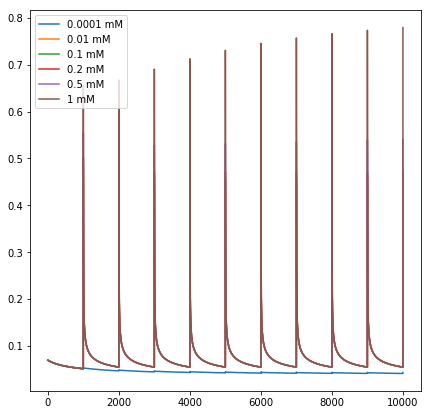

In [78]:
plt.figure(figsize = (7,7)) # w/ 20000
plt.plot(time21,Ca21*10**6,label='0.0001 mM')
plt.plot(time22,Ca22*10**6,label='0.01 mM')
plt.plot(time23,Ca23*10**6,label='0.1 mM')
plt.plot(time24,Ca24*10**6,label='0.2 mM')
plt.plot(time25,Ca25*10**6,label='0.5 mM')
plt.plot(time26,Ca26*10**6,label='1 mM')
plt.legend(loc=0)

[  0.00000000e+00   7.98478616e+00   1.50120591e+01 ...,   4.81659014e-82
   5.52739546e-82   6.24588174e-82]


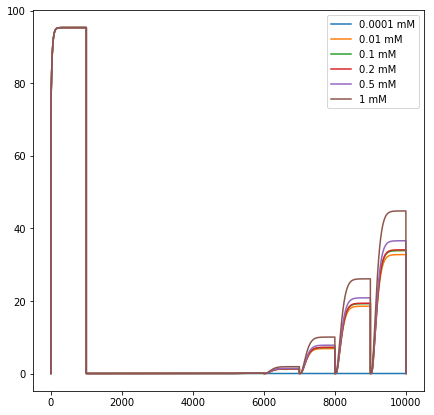

In [81]:
plt.figure(figsize = (7,7)) # w/ 20000
plt.plot(time21,TNFa_release_total21,label='0.0001 mM')
plt.plot(time22,TNFa_release_total22,label='0.01 mM')
plt.plot(time23,TNFa_release_total23,label='0.1 mM')
plt.plot(time24,TNFa_release_total24,label='0.2 mM')
plt.plot(time25,TNFa_release_total25,label='0.5 mM')
plt.plot(time26,TNFa_release_total26,label='1 mM')
plt.legend(loc=0)
#plt.xlim(60000,80000)
#plt.ylim(0,2e-72)
print(TNFa_release_total21)

In [34]:
i = 600000
f = 1000000

Camax = np.array([max(Ca21[i:f]),max(Ca22[i:f]),
                  max(Ca23[i:f]),max(Ca24[i:f]),
                  max(Ca25[i:f]),max(Ca26[i:f])])

CaMAX = max(Camax)

Camin = np.array([min(Ca21[i:f]),min(Ca22[i:f]),
                  min(Ca23[i:f]),min(Ca24[i:f]),
                  min(Ca25[i:f]),min(Ca26[i:f])])

deltaCa = np.array([Ca21[i:f]-Camin[0],
                    Ca22[i:f]-Camin[1],
                    Ca23[i:f]-Camin[2],
                    Ca24[i:f]-Camin[3],
                    Ca25[i:f]-Camin[4],
                    Ca26[i:f]-Camin[5]])

rCa = Camax/CaMAX*100

CaMCNmax = np.array([max(CaMCN21[i:f]),max(CaMCN22[i:f]),
                     max(CaMCN23[i:f]),max(CaMCN24[i:f]),
                     max(CaMCN25[i:f]),max(CaMCN26[i:f])])

CaMCNMAX = max(CaMCNmax)
rCaMCN = CaMCNmax/CaMCNMAX*100

NFATmax = np.array([max(NFATNn21[i:f]),max(NFATNn22[i:f]),
                    max(NFATNn23[i:f]),max(NFATNn24[i:f]),
                    max(NFATNn25[i:f]),max(NFATNn26[i:f])])

NFATMAX = max(NFATmax)
rNFAT = NFATmax/NFATMAX*100

TNFleakmax = np.array([max(TNFa_leak21[i:f]),max(TNFa_leak22[i:f]),
                       max(TNFa_leak23[i:f]),max(TNFa_leak24[i:f]),
                       max(TNFa_leak25[i:f]),max(TNFa_leak26[i:f])])
TNFleakMAX = max(TNFleakmax)
rTNFleak = TNFleakmax/TNFleakMAX*100

TNFrelmax = np.array([max(TNFa_release21[i:f]),max(TNFa_release22[i:f]),
                      max(TNFa_release23[i:f]),max(TNFa_release24[i:f]),
                      max(TNFa_release25[i:f]),max(TNFa_release26[i:f])])
TNFrelMAX = max(TNFrelmax)
rTNFrel = TNFrelmax/TNFrelMAX*100

TNFrelTmax = np.array([max(TNFa_release_total21[i:f]),max(TNFa_release_total22[i:f]),
                       max(TNFa_release_total23[i:f]),max(TNFa_release_total24[i:f]),
                       max(TNFa_release_total25[i:f]),max(TNFa_release_total26[i:f])])
TNFrelTMAX = max(TNFrelTmax)
rTNFrelT = TNFrelTmax/TNFrelTMAX*100

rTNFlr = np.array([TNFleakmax[0]/TNFrelTMAX*100,
                  TNFleakmax[1]/TNFrelTMAX*100,
                  TNFleakmax[2]/TNFrelTMAX*100,
                  TNFleakmax[3]/TNFrelTMAX*100,
                  TNFleakmax[4]/TNFrelTMAX*100,
                  TNFleakmax[5]/TNFrelTMAX*100,])
rTNFrr = np.array([TNFrelmax[0]/TNFrelTMAX*100,
                  TNFrelmax[1]/TNFrelTMAX*100,
                  TNFrelmax[2]/TNFrelTMAX*100,
                  TNFrelmax[3]/TNFrelTMAX*100,
                  TNFrelmax[4]/TNFrelTMAX*100,
                  TNFrelmax[5]/TNFrelTMAX*100,])

/home/AD/bch265/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


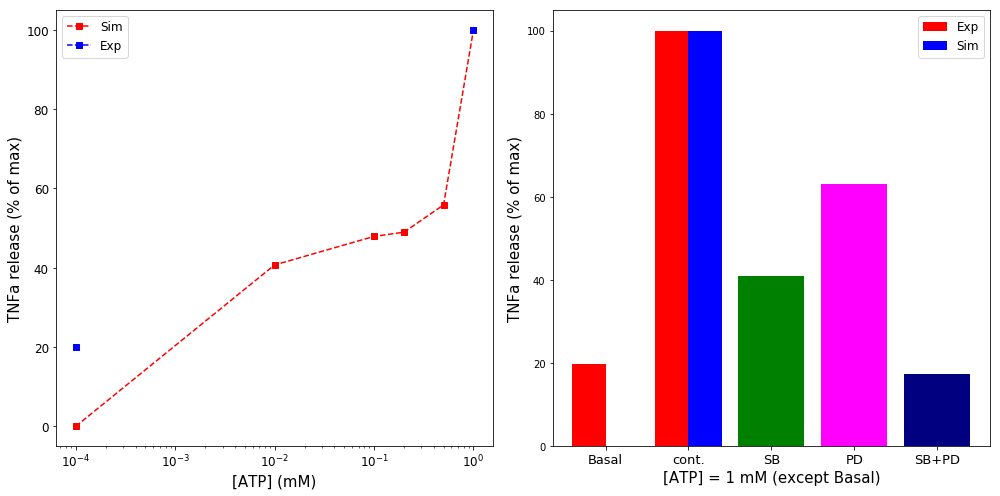

In [35]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
ATP = np.array([0.1, 10, 100, 200, 500, 1000])/1000 
expTNFa = np.array([20,np.nan,np.nan,np.nan,np.nan,100])    
p38inhibited = 41.03
p38ATP = 1000/1000
plt.tick_params(labelsize=12)
plt.semilogx(ATP,rTNFrelT,'r--s',label="Sim")
plt.semilogx(ATP,expTNFa,'b--s',label="Exp")
#plt.semilogx(p38ATP,41.03,'k--s',label="Exp-inhibited p38")
plt.xlabel("[ATP] (mM)",fontsize=15)
plt.ylabel("TNFa release (% of max)",fontsize=15)
plt.legend(loc=0,fontsize=12)
plt.ylim(-5,105)
plt.tight_layout()
#plt.savefig('ampTNFasemilogx.png')

plt.tick_params(labelsize=12)
ax = plt.subplot(1,2,2)
b1 = ax.bar(1-0.2,19.74,0.4,color="red",alpha=1)
b2 = ax.bar(1+0.2,rTNFrelT[0],0.4,color="blue",alpha=1)
b3 = ax.bar(2-0.2,100,0.4,color="red",alpha=1)
b4 = ax.bar(2+0.2,rTNFrelT[5],0.4,color="blue",alpha=1)
b5 = ax.bar(3,41.0389,0.8,color="green",alpha=1)
b6 = ax.bar(4,63.11688,0.8,color="magenta",alpha=1)
b7 = ax.bar(5,17.4025974,0.8,color="navy",alpha=1)

ax.set_ylabel("TNFa release (% of max)",fontsize=15)
ax.legend((b1[0],b2[0]),('Exp','Sim'),fontsize=12)
newInd = np.array([1,2,3,4,5])
ax.set_xticks(newInd)
ax.set_xticklabels(['Basal','cont.','SB','PD','SB+PD'],fontsize=13)
ax.set_xlabel("[ATP] = 1 mM (except Basal)",horizontalalignment='center',fontsize=15)
plt.tight_layout()
plt.savefig('inhibitorvsTNFandampTNFa1hr.png')

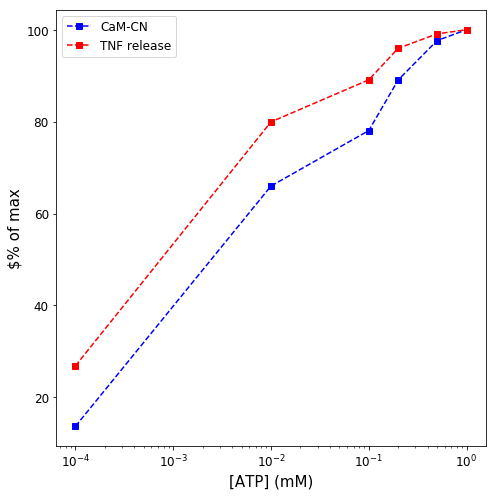

In [167]:
ATP = np.array([0.1, 10, 100, 200, 500, 1000])/1000 
plt.figure(figsize = (7,7))
plt.tick_params(labelsize=12)
plt.semilogx(ATP,rCaMCN,'b--s',label="CaM-CN")
plt.semilogx(ATP,rTNFrelT,'r--s',label="TNF release")
plt.xlabel("[ATP] (mM)",fontsize=15)
plt.ylabel("$% of max",fontsize=15)
plt.legend(loc=0,fontsize=12)
plt.tight_layout()
plt.savefig('ampCaMCNTNFasemilogx.png')

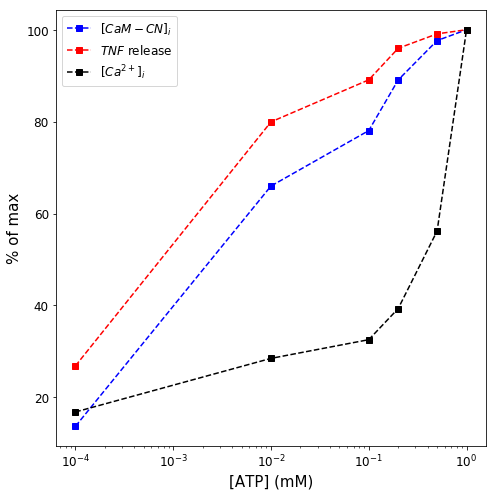

In [230]:
ATP = np.array([0.1, 10, 100, 200, 500, 1000])/1000 
plt.figure(figsize = (7,7))
plt.tick_params(labelsize=12)
plt.semilogx(ATP,rCaMCN,'b--s',label="$[CaM-CN]_{i}$")
plt.semilogx(ATP,rTNFrelT,'r--s',label="$TNF \alpha$ release")
plt.semilogx(ATP,rCa,'k--s',label="$[Ca^{2+}]_{i}$")
plt.xlabel("[ATP] (mM)",fontsize=15)
plt.ylabel("% of max",fontsize=15)
plt.legend(loc=0,fontsize=12)
plt.tight_layout()
plt.savefig('ampCaCaMCNTNFasemilogx.png')

### ATP vs relative CaM-CN  at 0.1 Hz

/home/AD/bch265/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


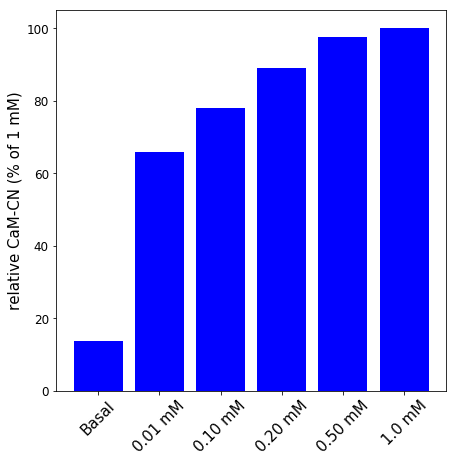

In [96]:
plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
ax = plt.subplot()
b2 = ax.bar(1,rCaMCN[0],0.8,color="blue",alpha=1)
b4 = ax.bar(2,rCaMCN[1],0.8,color="blue",alpha=1)
b6 = ax.bar(3,rCaMCN[2],0.8,color="blue",alpha=1)
b8 = ax.bar(4,rCaMCN[3],0.8,color="blue",alpha=1)
b10 = ax.bar(5,rCaMCN[4],0.8,color="blue",alpha=1)
b13 = ax.bar(6,rCaMCN[5],0.8,color="blue",alpha=1)

ax.set_ylabel("relative CaM-CN (% of 1 mM)",fontsize=15)
#ax.legend((b1[0],b2[0]),('Exp','Sim'),fontsize=12)
newInd = np.array([1,2,3,4,5,6])
ax.set_xticks(newInd)
ax.set_xticklabels(['Basal','0.01 mM','0.10 mM','0.20 mM','0.50 mM','1.0 mM'],rotation=45,fontsize=15)
plt.savefig('ATPvsCaMCN.png')

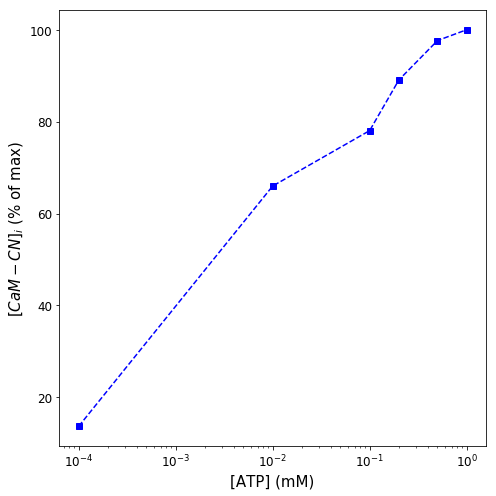

In [157]:
ATP = np.array([0.1, 10, 100, 200, 500, 1000])/1000 
plt.figure(figsize = (7,7))
plt.tick_params(labelsize=12)
plt.semilogx(ATP,rCaMCN,'b--s')
plt.xlabel("[ATP] (mM)",fontsize=15)
plt.ylabel("$[CaM-CN]_{i}$ (% of max)",fontsize=15)
plt.legend(loc=0,fontsize=12)
plt.tight_layout()
plt.savefig('ampCaMCNsemilogx.png')

/home/AD/bch265/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


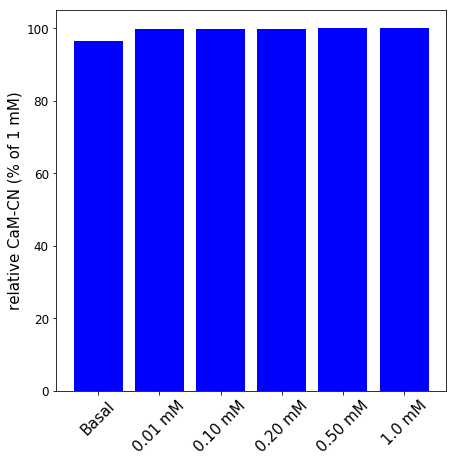

In [97]:
plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
ax = plt.subplot()
b2 = ax.bar(1,rNFAT[0],0.8,color="blue",alpha=1)
b4 = ax.bar(2,rNFAT[1],0.8,color="blue",alpha=1)
b6 = ax.bar(3,rNFAT[2],0.8,color="blue",alpha=1)
b8 = ax.bar(4,rNFAT[3],0.8,color="blue",alpha=1)
b10 = ax.bar(5,rNFAT[4],0.8,color="blue",alpha=1)
b13 = ax.bar(6,rNFAT[5],0.8,color="blue",alpha=1)

ax.set_ylabel("relative CaM-CN (% of 1 mM)",fontsize=15)
#ax.legend((b1[0],b2[0]),('Exp','Sim'),fontsize=12)
newInd = np.array([1,2,3,4,5,6])
ax.set_xticks(newInd)
ax.set_xticklabels(['Basal','0.01 mM','0.10 mM','0.20 mM','0.50 mM','1.0 mM'],rotation=45,fontsize=15)
plt.savefig('ATPvsNFAT.png')

### ATP vs relative TNFa release and max Ca at 0.1 Hz

/home/AD/bch265/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


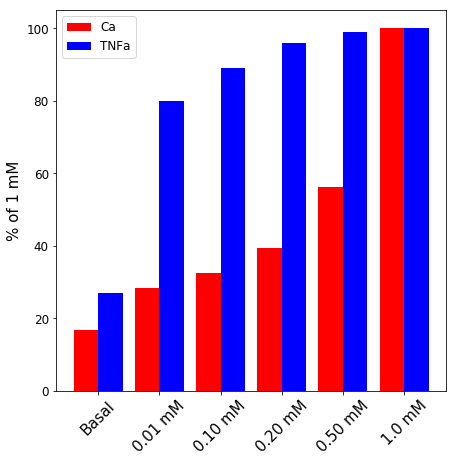

In [112]:
plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
ax = plt.subplot()
b1 = ax.bar(1-0.2,rCa[0],0.4,color="red",alpha=1,label="Ca")
b3 = ax.bar(1+0.2,rTNFrelT[0],0.4,color="blue",alpha=1,label="TNFa")

b4 = ax.bar(2-0.2,rCa[1],0.4,color="red",alpha=1,label="Ca")
b6 = ax.bar(2+0.2,rTNFrelT[1],0.4,color="blue",alpha=1,label="TNFa")

b7 = ax.bar(3-0.2,rCa[2],0.4,color="red",alpha=1,label="Ca")
b9 = ax.bar(3+0.2,rTNFrelT[2],0.4,color="blue",alpha=1,label="TNFa")

b10 = ax.bar(4-0.2,rCa[3],0.4,color="red",alpha=1,label="Ca")
b12 = ax.bar(4+0.2,rTNFrelT[3],0.4,color="blue",alpha=1,label="TNFa")

b13 = ax.bar(5-0.2,rCa[4],0.4,color="red",alpha=1,label="Ca")
b15 = ax.bar(5+0.2,rTNFrelT[4],0.4,color="blue",alpha=1,label="TNFa")

b16 = ax.bar(6-0.2,rCa[5],0.4,color="red",alpha=1,label="Ca")
b18 = ax.bar(6+0.2,rTNFrelT[5],0.4,color="blue",alpha=1,label="TNFa")

ax.set_ylabel("% of 1 mM",fontsize=15)
ax.legend(handles=[b1,b3],fontsize=12)
newInd = np.array([1,2,3,4,5,6])
ax.set_xticks(newInd)
ax.set_xticklabels(['Basal','0.01 mM','0.10 mM','0.20 mM','0.50 mM','1.0 mM'],rotation=45,fontsize=15)
plt.savefig('Ca_TNFvsATP.png')

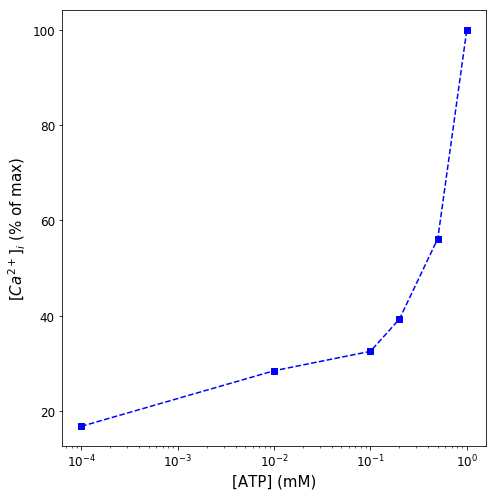

In [156]:
ATP = np.array([0.1, 10, 100, 200, 500, 1000])/1000 
plt.figure(figsize = (7,7))
plt.tick_params(labelsize=12)
plt.semilogx(ATP,rCa,'b--s')
plt.xlabel("[ATP] (mM)",fontsize=15)
plt.ylabel("$[Ca^{2+}]_{i}$ (% of max)",fontsize=15)
plt.legend(loc=0,fontsize=12)
plt.tight_layout()
plt.savefig('ampCasemilogx.png')

### Stimulation frequencies vs Max Ca and TNF release at 1.0 mM ATP

/home/AD/bch265/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


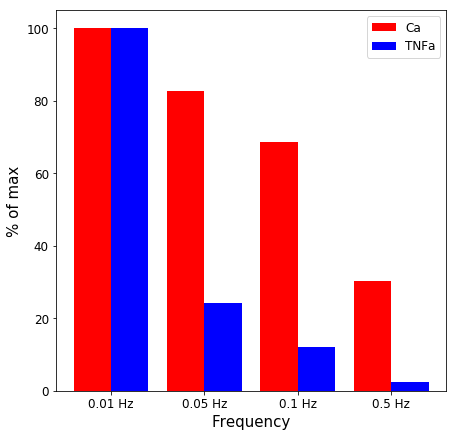

In [113]:
plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
ax = plt.subplot()
b1 = ax.bar(1-0.2,rCaf[3],0.4,color="red",alpha=1,label="Ca")
b3 = ax.bar(1+0.2,rTNFrelTf[3],0.4,color="blue",alpha=1,label="TNFa")

b4 = ax.bar(2-0.2,rCaf[2],0.4,color="red",alpha=1,label="Ca")
b6 = ax.bar(2+0.2,rTNFrelTf[2],0.4,color="blue",alpha=1,label="TNFa")

b7 = ax.bar(3-0.2,rCaf[0],0.4,color="red",alpha=1,label="Ca")
b9 = ax.bar(3+0.2,rTNFrelTf[0],0.4,color="blue",alpha=1,label="TNFa")

b10 = ax.bar(4-0.2,rCaf[1],0.4,color="red",alpha=1,label="Ca")
b12 = ax.bar(4+0.2,rTNFrelTf[1],0.4,color="blue",alpha=1,label="TNFa")


ax.set_ylabel("% of max",fontsize=15)
ax.legend(handles=[b1,b3],fontsize=12)
newInd = np.array([1,2,3,4])
ax.set_xticks(newInd)
ax.set_xticklabels(['0.01 Hz', '0.05 Hz', '0.1 Hz','0.5 Hz'],fontsize=12)
ax.set_xlabel("Frequency",fontsize=15)
plt.savefig('freqvsCa_TNF.png')

/home/AD/bch265/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


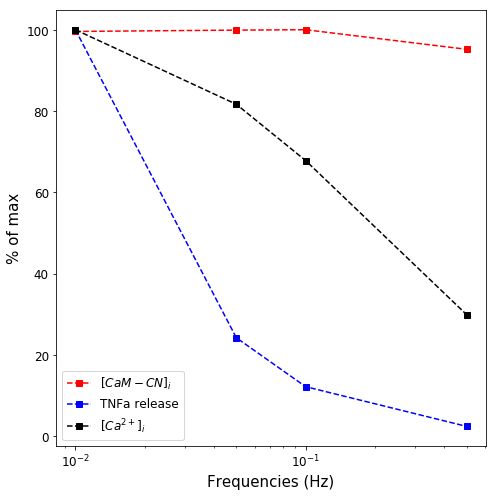

In [246]:
freq = np.array([0.01,0.05,0.1,0.5])
Caf = np.array([rCaf[3],rCaf[2],rCaf[0],rCaf[1]])
TNFf = np.array([rTNFrelTf[3],rTNFrelTf[2],rTNFrelTf[0],rTNFrelTf[1]])
CaMCNf = np.array([rCaMCNf[3],rCaMCNf[2],rCaMCNf[0],rCaMCNf[1]])
plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
plt.subplot()
plt.semilogx(freq,CaMCNf,'r--s',alpha=1,label="$[CaM-CN]_{i}$")
plt.semilogx(freq,TNFf,'b--s',alpha=1,label="TNFa release")
plt.semilogx(freq,Caf,'k--s',alpha=1,label="$[Ca^{2+}]_{i}$")

plt.ylabel("% of max",fontsize=15)
plt.xlabel("Frequencies (Hz)",fontsize=15)
plt.legend(loc=0,fontsize=12)
plt.tight_layout()
plt.savefig('freqvsCaCaMCNTNFlog.png')

/home/AD/bch265/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


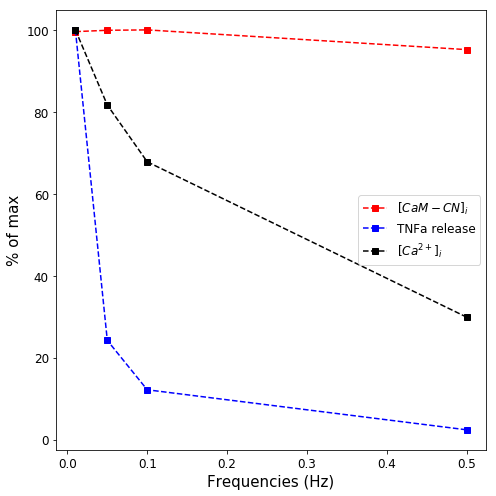

In [247]:
freq = np.array([0.01,0.05,0.1,0.5])
Caf = np.array([rCaf[3],rCaf[2],rCaf[0],rCaf[1]])
TNFf = np.array([rTNFrelTf[3],rTNFrelTf[2],rTNFrelTf[0],rTNFrelTf[1]])
plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
plt.subplot()
plt.plot(freq,CaMCNf,'r--s',alpha=1,label="$[CaM-CN]_{i}$")
plt.plot(freq,TNFf,'b--s',alpha=1,label="TNFa release")
plt.plot(freq,Caf,'k--s',alpha=1,label="$[Ca^{2+}]_{i}$")

plt.ylabel("% of max",fontsize=15)
plt.xlabel("Frequencies (Hz)",fontsize=15)
plt.legend(loc=0,fontsize=12)
plt.tight_layout()
plt.savefig('freqvsCaCaMCNTNF.png')

/home/AD/bch265/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


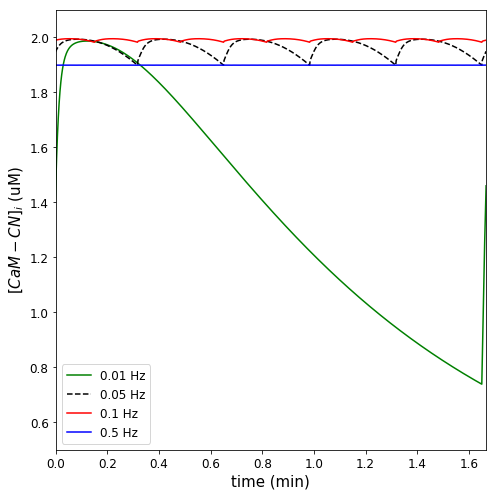

In [257]:
plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
plt.subplot()

plt.plot((time9-19900)/60,CaMCN9*10**6,'g-',alpha=1,label="0.01 Hz")
plt.plot((time8-19900)/60,CaMCN8*10**6,'k--',alpha=1,label="0.05 Hz")
plt.plot((time6-19900)/60,CaMCN6*10**6,'r-',alpha=1,label="0.1 Hz")
plt.plot((time7-19900)/60,CaMCN7*10**6,'b-',alpha=1,label="0.5 Hz")

plt.xlim(0,100/60)
plt.ylim(0.5,2.1)
plt.ylabel("$[CaM-CN]_{i}$ (uM)",fontsize=15)
plt.xlabel("time (min)",fontsize=15)
plt.legend(loc=0,fontsize=12)
plt.tight_layout()
plt.savefig('CaMCNprofilefreq.png')

### Stimulation frequencies vs TNF release at 1.0 mM ATP -decomposed

/home/AD/bch265/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


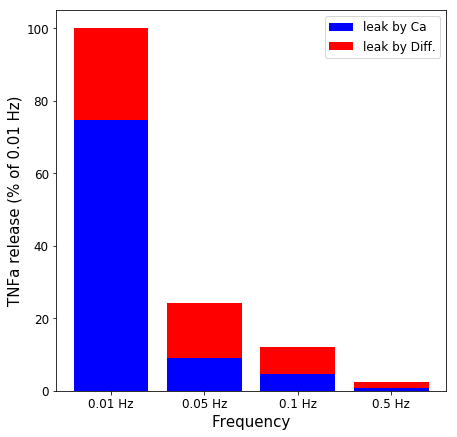

In [114]:
plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
ax = plt.subplot()
b1 = ax.bar(1,rTNFlrf[3],0.8,color="blue",alpha=1)
b2 = ax.bar(1,rTNFrrf[3],0.8,color="red",alpha=1,bottom=rTNFlrf[3])

b3 = ax.bar(2,rTNFlrf[2],0.8,color="blue",alpha=1)
b4 = ax.bar(2,rTNFrrf[2],0.8,color="red",alpha=1,bottom=rTNFlrf[2])

b5 = ax.bar(3,rTNFlrf[0],0.8,color="blue",alpha=1)
b6 = ax.bar(3,rTNFrrf[0],0.8,color="red",alpha=1,bottom=rTNFlrf[0])

b7 = ax.bar(4,rTNFlrf[1],0.8,color="blue",alpha=1)
b8 = ax.bar(4,rTNFrrf[1],0.8,color="red",alpha=1,bottom=rTNFlrf[1])

ax.set_ylabel("TNFa release (% of 0.01 Hz)",fontsize=15)
ax.set_xlabel("Frequency",fontsize=15)
ax.legend((b1[0],b2[0]),('leak by Ca','leak by Diff.'),fontsize=12)
newInd = np.array([1,2,3,4])
ax.set_xticks(newInd)
ax.set_xticklabels(['0.01 Hz', '0.05 Hz', '0.1 Hz','0.5 Hz'],fontsize=12)
plt.savefig('freqvsTNF_decomp.png')

### Stimulation frequencies vs TNF release at 1.0 mM ATP

/home/AD/bch265/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


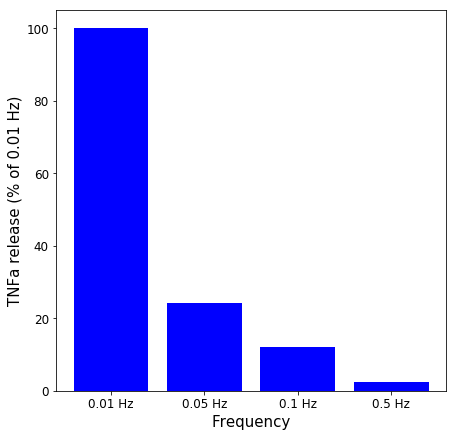

In [115]:
plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
ax = plt.subplot()
b1 = ax.bar(1,rTNFrelTf[3],0.8,color="blue",alpha=1)

b3 = ax.bar(2,rTNFrelTf[2],0.8,color="blue",alpha=1)

b5 = ax.bar(3,rTNFrelTf[0],0.8,color="blue",alpha=1)

b7 = ax.bar(4,rTNFrelTf[1],0.8,color="blue",alpha=1)

ax.set_ylabel("TNFa release (% of 0.01 Hz)",fontsize=15)
ax.set_xlabel("Frequency",fontsize=15)
newInd = np.array([1,2,3,4])
ax.set_xticks(newInd)
ax.set_xticklabels(['0.01 Hz', '0.05 Hz', '0.1 Hz','0.5 Hz'],fontsize=12)
plt.savefig('freqvsTNF.png')

### Ca profile vs. NFATNn profile at 0.1 Hz and 1.0 mM ATP

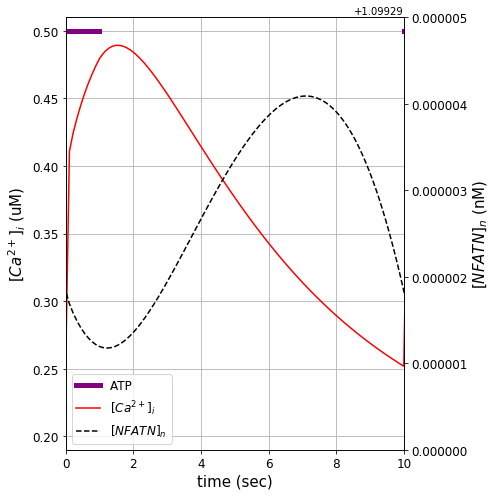

In [104]:
plt.figure(figsize = (7,7))
ax = plt.subplot()
ax2 = ax.twinx()
#ax.tick_params(labelsize=15)
lns1 = ax.plot(time6-t_new-19,Ca6*10**6,'r-',label="$[Ca^{2+}]_{i}$")
lns2 = ax2.plot(time6-t_new-19,NFATNn6,'k--',label="$[NFATN]_{n}$")
lns3 = ax.plot(timeATP-t_new-19,ATP,'purple',label="ATP",linewidth=5)
ax.set_xlabel("time (sec)",fontsize=15)
ax.set_ylabel("$[Ca^{2+}]_{i}$ (uM)",fontsize=15)
ax2.set_ylabel("$[NFATN]_{n}$ (nM)",fontsize=15)
ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
lns = lns3 + lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc=0, fontsize=12)
ax.grid(True)
ax.set_ylim(0.19,0.51)
ax2.set_ylim(1.09929,1.099295)
plt.xlim(0,t_int-20)
plt.tight_layout()
plt.savefig('CavsNFAT_1mM_01Hz.png')

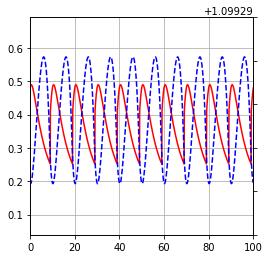

In [30]:
plt.figure(figsize = (4,4))
ax = plt.subplot()
ax2 = ax.twinx()
lns1 = ax.plot(time6-t_new,Ca6*10**6,'r-',label="$[Ca^{2+}]_{i}$")
lns2 = ax2.plot(time6-t_new,NFATNn6,'b--',label="$[NFATN]_{n}$")
#ax.set_xlabel("time [sec]",fontsize=15)
#ax.set_ylabel("Ca conc. [uM]",fontsize=15)
#ax2.set_ylabel("NFATNn conc. [nM]",fontsize=15)
#ax.tick_params(labelsize=12)
#ax2.tick_params(labelsize=12)
#lns = lns1 + lns2
#labs = [l.get_label() for l in lns]
#ax.legend(lns,labs,loc=0, fontsize=12)
#ax.grid(True)
#ax.set_ylim(0,0.4)
ax2.set_ylim(1.09929,1.099295)
plt.xlim(0,100)
#plt.tight_layout()
plt.locator_params(axis='y', nticks=2)
plt.xticks(visible=False)
plt.yticks(visible=False)
ax.grid(True)
#plt.savefig('CavsNFATsmall.png')

### Ca profile vs. CaM-CN profile at 0.1 Hz and 1.0 mM ATP

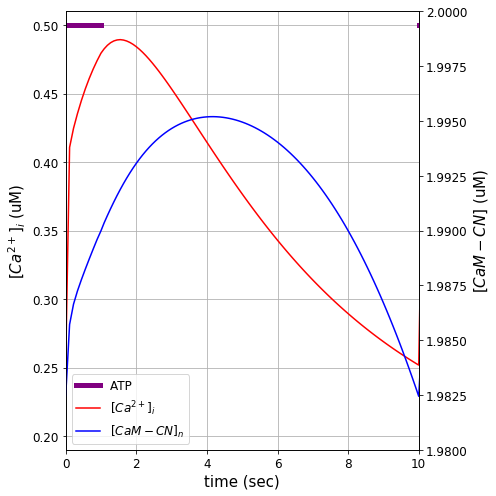

In [106]:
plt.figure(figsize = (7,7))
ax = plt.subplot()
ax2 = ax.twinx()
#ax.tick_params(labelsize=15)
lns1 = ax.plot(time6-t_new-19,Ca6*10**6,'r-',label="$[Ca^{2+}]_{i}$")
lns2 = ax2.plot(time6-t_new-19,CaMCN6*10**6,'b-',label="$[CaM-CN]_{n}$")
lns3 = ax.plot(timeATP-t_new-19,ATP,'purple',label="ATP",linewidth=5)
ax.set_xlabel("time (sec)",fontsize=15)
ax.set_ylabel("$[Ca^{2+}]_{i}$ (uM)",fontsize=15)
ax2.set_ylabel("$[CaM-CN]$ (uM)",fontsize=15)
ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
lns = lns3 + lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc=0, fontsize=12)
ax.grid(True)
ax.set_ylim(0.19,0.51)
ax2.set_ylim(1.98,2.0)
plt.xlim(0,10)
plt.tight_layout()
plt.savefig('CavsCaMCN_1mM_01Hz.png')

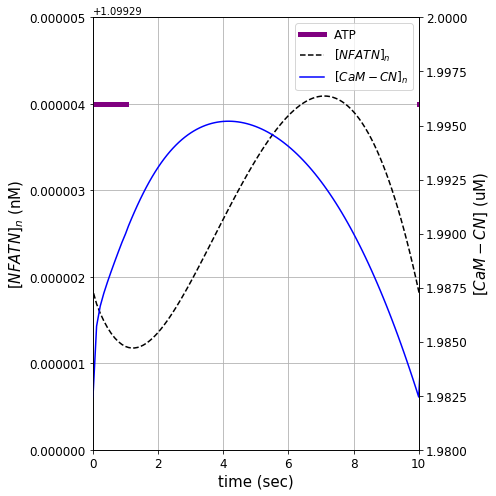

In [107]:
t_int = 30
t_end = 20000
t_new = t_end-t_int
plt.figure(figsize = (7,7))
ax = plt.subplot()
ax2 = ax.twinx()
lns1 = ax.plot(time6-t_new-19,NFATNn6,'k--',label="$[NFATN]_{n}$")
lns2 = ax2.plot(time6-t_new-19,CaMCN6*10**6,'b-',label="$[CaM-CN]_{n}$")
lns3 = ax2.plot(timeATP-t_new-19,ATP+1.496,'purple',label="ATP",linewidth=5)
ax.set_xlabel("time (sec)",fontsize=15)
ax.set_ylabel("$[NFATN]_{n}$ (nM)",fontsize=15)
ax2.set_ylabel("$[CaM-CN]$ (uM)",fontsize=15)
ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
lns = lns3 + lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc=0, fontsize=12)
ax.set_ylim(1.09929,1.099295)
ax2.set_ylim(1.98,2.0)
ax.grid(True)
plt.xlim(0,t_int-20)
plt.tight_layout()
plt.savefig('NFATvsCaMCN_1mM_01Hz_long.png')

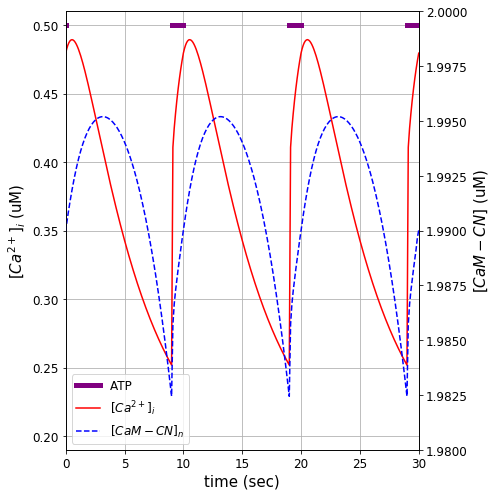

In [96]:
plt.figure(figsize = (7,7))
ax = plt.subplot()
ax2 = ax.twinx()
lns1 = ax.plot(time6-t_new,Ca6*10**6,'r-',label="$[Ca^{2+}]_{i}$")
lns2 = ax2.plot(time6-t_new,CaMCN6*10**6,'b--',label="$[CaM-CN]_{n}$")
lns3 = ax.plot(timeATP-t_new,ATP,'purple',label="ATP",linewidth=5)
ax.set_xlabel("time (sec)",fontsize=15)
ax.set_ylabel("$[Ca^{2+}]_{i}$ (uM)",fontsize=15)
ax2.set_ylabel("$[CaM-CN]$ (uM)",fontsize=15)
ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
lns = lns3 + lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc=0, fontsize=12)
ax.set_ylim(0.19,0.51)
ax2.set_ylim(1.98,2.0)
ax.grid(True)
plt.xlim(0,t_int)
plt.tight_layout()
plt.savefig('CavsCaMCN_1mM_01Hz_long.png')

In [54]:
results10 = ca.total(10800,20,10,12000,10)
pk.dump(results10,open("3hrs001mM.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [55]:
results11 = ca.total(10800,20,10,12000,100)
pk.dump(results11,open("3hrs01mM.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [56]:
results12 = ca.total(10800,20,10,12000,200)
pk.dump(results12,open("3hrs02mM.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [57]:
results13 = ca.total(10800,20,10,12000,1000)
pk.dump(results13,open("3hrs1mM.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [3]:
data10 = pk.load(open("3hrs001mM.p","rb"))
data11 = pk.load(open("3hrs01mM.p","rb"))
data12 = pk.load(open("3hrs02mM.p","rb"))
data13 = pk.load(open("3hrs1mM.p","rb"))

In [4]:
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data10
Ca10 = Cai
Ca2CaM10 = Ca2CaM
Ca4CaM10 = Ca4CaM
Ca4CN10 = Ca4CN
CaMCN10 = CaMCN
NFATNn10 = NFATNn
TNFa_leak10 = TNFa_leak
TNFa_release10 = TNFa_release
TNFa_release_total10 = TNFa_release_total
time10 = time

In [5]:
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data11
Ca11 = Cai
Ca2CaM11 = Ca2CaM
Ca4CaM11 = Ca4CaM
Ca4CN11 = Ca4CN
CaMCN11 = CaMCN
NFATNn11 = NFATNn
TNFa_leak11 = TNFa_leak
TNFa_release11 = TNFa_release
TNFa_release_total11 = TNFa_release_total
time11 = time

In [6]:
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data12
Ca12 = Cai
Ca2CaM12 = Ca2CaM
Ca4CaM12 = Ca4CaM
Ca4CN12 = Ca4CN
CaMCN12 = CaMCN
NFATNn12 = NFATNn
TNFa_leak12 = TNFa_leak
TNFa_release12 = TNFa_release
TNFa_release_total12 = TNFa_release_total
time12 = time

In [7]:
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data13
Ca13 = Cai
Ca2CaM13 = Ca2CaM
Ca4CaM13 = Ca4CaM
Ca4CN13 = Ca4CN
CaMCN13 = CaMCN
NFATNn13 = NFATNn
TNFa_leak13 = TNFa_leak
TNFa_release13 = TNFa_release
TNFa_release_total13 = TNFa_release_total
time13 = time

In [39]:
iters1 = np.arange(np.shape(time10)[0])
D10 = []
D11 = []
D12 = []
D13 = []
t_end2 = 480000
t_int2 = 0
t_new2 = 420000
k = 0


D10 = np.array([Ca10[t_new2*10:t_end2*10],Ca2CaM10[t_new2*10:t_end2*10],
               Ca4CaM10[t_new2*10:t_end2*10],Ca4CN10[t_new2*10:t_end2*10],CaMCN10[t_new2*10:t_end2*10],
               NFATNn10[t_new2*10:t_end2*10],
               TNFa_leak10[t_new2*10:t_end2*10],TNFa_release10[t_new2*10:t_end2*10],
               TNFa_release_total10[t_new2*10:t_end2*10],time10[t_new2*10:t_end2*10]])
D11 = np.array([Ca11[t_new2*10:t_end2*10],Ca2CaM11[t_new2*10:t_end2*10],
               Ca4CaM11[t_new2*10:t_end2*10],Ca4CN11[t_new2*10:t_end2*10],CaMCN11[t_new2*10:t_end2*10],
               NFATNn11[t_new2*10:t_end2*10],
               TNFa_leak11[t_new2*10:t_end2*10],TNFa_release11[t_new2*10:t_end2*10],
               TNFa_release_total11[t_new2*10:t_end2*10],time11[t_new2*10:t_end2*10]])
D12 = np.array([Ca12[t_new2*10:t_end2*10],Ca2CaM12[t_new2*10:t_end2*10],
               Ca4CaM12[t_new2*10:t_end2*10],Ca4CN12[t_new2*10:t_end2*10],CaMCN12[t_new2*10:t_end2*10],
               NFATNn12[t_new2*10:t_end2*10],
               TNFa_leak12[t_new2*10:t_end2*10],TNFa_release12[t_new2*10:t_end2*10],
               TNFa_release_total12[t_new2*10:t_end2*10],time12[t_new2*10:t_end2*10]])
D13 = np.array([Ca13[t_new2*10:t_end2*10],Ca2CaM13[t_new2*10:t_end2*10],
               Ca4CaM13[t_new2*10:t_end2*10],Ca4CN13[t_new2*10:t_end2*10],CaMCN13[t_new2*10:t_end2*10],
               NFATNn13[t_new2*10:t_end2*10],
               TNFa_leak13[t_new2*10:t_end2*10],TNFa_release13[t_new2*10:t_end2*10],
               TNFa_release_total13[t_new2*10:t_end2*10],time13[t_new2*10:t_end2*10]])
        


            
Camax = np.array([max(Ca10[t_new2*10:t_end2*10]),max(Ca11[t_new2*10:t_end2*10]),
                  max(Ca12[t_new2*10:t_end2*10]),max(Ca13[t_new2*10:t_end2*10])])
CaMAX = max(Camax)
rCa = Camax/CaMAX*100

TNFrelTmax = np.array([max(TNFa_release_total10[t_new2*10:t_end2*10]),max(TNFa_release_total11[t_new2*10:t_end2*10]),
                       max(TNFa_release_total12[t_new2*10:t_end2*10]),max(TNFa_release_total13[t_new2*10:t_end2*10])])
TNFrelTMAX = max(TNFrelTmax)
rTNFrelT = TNFrelTmax/TNFrelTMAX*100


In [40]:
print(TNFrelTmax)

[ 42086.43756386  41842.67315424  41237.37352005  39267.69931149]


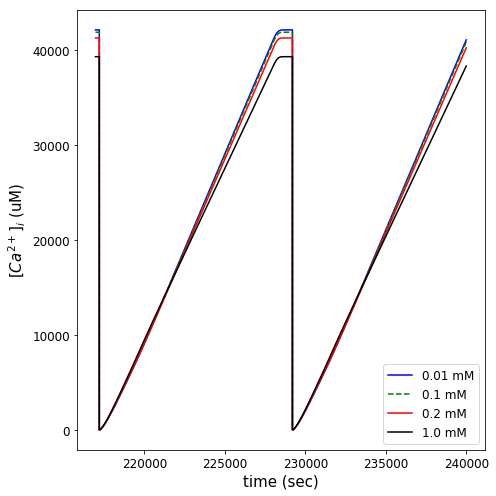

In [36]:
plt.figure(figsize = (7,7))
plt.tick_params(labelsize=12)
plt.plot(time10[t_new2*10:t_end2*10],TNFa_release_total10[t_new2*10:t_end2*10],'b-',label="0.01 mM")
plt.plot(time10[t_new2*10:t_end2*10],TNFa_release_total11[t_new2*10:t_end2*10],'g--',label="0.1 mM")
plt.plot(time10[t_new2*10:t_end2*10],TNFa_release_total12[t_new2*10:t_end2*10],'r-',label="0.2 mM")
plt.plot(time10[t_new2*10:t_end2*10],TNFa_release_total13[t_new2*10:t_end2*10],'k-',label="1.0 mM")
plt.xlabel("time (sec)",fontsize=15)
plt.ylabel("$[Ca^{2+}]_{i}$ (uM)",fontsize=15)
plt.legend(loc=0,fontsize=12)
#plt.xlim(0,229000-217000)
#plt.ylim(0.0,0.01)
plt.tight_layout()

/home/AD/bch265/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[Text(0,0,'1.0 mM'),
 Text(0,0,'0.2 mM'),
 Text(0,0,'0.1 mM'),
 Text(0,0,'0.01 mM')]

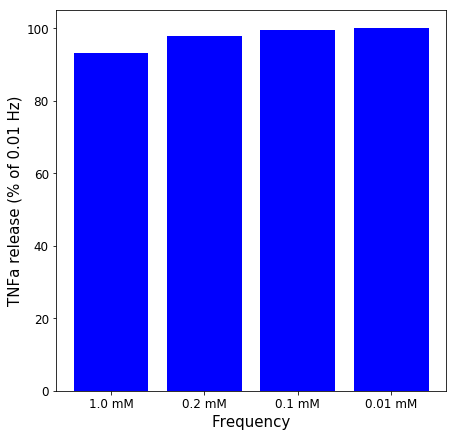

In [41]:
plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
ax = plt.subplot()
b1 = ax.bar(1,rTNFrelT[3],0.8,color="blue",alpha=1)

b2 = ax.bar(2,rTNFrelT[2],0.8,color="blue",alpha=1)

b3 = ax.bar(3,rTNFrelT[1],0.8,color="blue",alpha=1)

b4 = ax.bar(4,rTNFrelT[0],0.8,color="blue",alpha=1)

ax.set_ylabel("TNFa release (% of 0.01 Hz)",fontsize=15)
ax.set_xlabel("Frequency",fontsize=15)
newInd = np.array([1,2,3,4])
ax.set_xticks(newInd)
ax.set_xticklabels(['1.0 mM', '0.2 mM', '0.1 mM','0.01 mM'],fontsize=12)

### Duration related calculations

In [18]:
results14 = ca.total(2,20,10,1000,1000)
pk.dump(results14,open("1mMdur2sec0001Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [19]:
results15 = ca.total(10,20,10,1000,1000)
pk.dump(results15,open("1mMdur10sec0001Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [20]:
results16 = ca.total(50,20,10,1000,1000)
pk.dump(results16,open("1mMdur50sec0001Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [27]:
results17 = ca.total(75,20,10,1000,1000)
pk.dump(results17,open("1mMdur75sec0001Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [28]:
results18 = ca.total(1,20,10,1000,1000)
pk.dump(results18,open("1mMdur1sec0001Hz.p","wb"))

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [5]:
data14 = pk.load(open("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/Data/MG-p2x-CaMCN-v6/1mMdur2sec0001Hz.p","rb"))
data15 = pk.load(open("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/Data/MG-p2x-CaMCN-v6/1mMdur10sec0001Hz.p","rb"))
data16 = pk.load(open("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/Data/MG-p2x-CaMCN-v6/1mMdur50sec0001Hz.p","rb"))
data17 = pk.load(open("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/Data/MG-p2x-CaMCN-v6/1mMdur75sec0001Hz.p","rb"))

In [6]:
data9 = pk.load(open("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/Data/MG-p2x-CaMCN-v6/1mMdur1sec0001Hz.p","rb"))

In [105]:
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data9
p4Q19 = p4Q1
p4Q29 = p4Q2
p4Q39 = p4Q3
p4Q49 = p4Q4
p7Q19 = p7Q1
p7Q29 = p7Q2
p7Q39 = p7Q3
p7Q49 = p7Q4
Ca9 = Cai
Ca2CaM9 = Ca2CaM
Ca4CaM9 = Ca4CaM
Ca4CN9 = Ca4CN
CaMCN9 = CaMCN
NFATNn9 = NFATNn
TNFa_leak9 = TNFa_leak
TNFa_release9 = TNFa_release
TNFa_release_total9 = TNFa_release_total
time9 = time

In [99]:
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data14
p4Q14 = p4Q1
p4Q24 = p4Q2
p4Q34 = p4Q3
p4Q44 = p4Q4
p7Q14 = p7Q1
p7Q24 = p7Q2
p7Q34 = p7Q3
p7Q44 = p7Q4
Ca14 = Cai
Ca2CaM14 = Ca2CaM
Ca4CaM14 = Ca4CaM
Ca4CN14 = Ca4CN
CaMCN14 = CaMCN
NFATNn14 = NFATNn
TNFa_leak14 = TNFa_leak
TNFa_release14 = TNFa_release
TNFa_release_total14 = TNFa_release_total
time14 = time

In [104]:
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data15
p4Q15 = p4Q1
p4Q25 = p4Q2
p4Q35 = p4Q3
p4Q45 = p4Q4
p7Q15 = p7Q1
p7Q25 = p7Q2
p7Q35 = p7Q3
p7Q45 = p7Q4
Ca15 = Cai
Ca2CaM15 = Ca2CaM
Ca4CaM15 = Ca4CaM
Ca4CN15 = Ca4CN
CaMCN15 = CaMCN
NFATNn15 = NFATNn
TNFa_leak15 = TNFa_leak
TNFa_release15 = TNFa_release
TNFa_release_total15 = TNFa_release_total
time15 = time

In [101]:
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data16
p4Q16 = p4Q1
p4Q26 = p4Q2
p4Q36 = p4Q3
p4Q46 = p4Q4
p7Q16 = p7Q1
p7Q26 = p7Q2
p7Q36 = p7Q3
p7Q46 = p7Q4
Ca16 = Cai
Ca2CaM16 = Ca2CaM
Ca4CaM16 = Ca4CaM
Ca4CN16 = Ca4CN
CaMCN16 = CaMCN
NFATNn16 = NFATNn
TNFa_leak16 = TNFa_leak
TNFa_release16 = TNFa_release
TNFa_release_total16 = TNFa_release_total
time16 = time

In [102]:
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = data17
p4Q17 = p4Q1
p4Q27 = p4Q2
p4Q37 = p4Q3
p4Q47 = p4Q4
p7Q17 = p7Q1
p7Q27 = p7Q2
p7Q37 = p7Q3
p7Q47 = p7Q4
Ca17 = Cai
Ca2CaM17 = Ca2CaM
Ca4CaM17 = Ca4CaM
Ca4CN17 = Ca4CN
CaMCN17 = CaMCN
NFATNn17 = NFATNn
TNFa_leak17 = TNFa_leak
TNFa_release17 = TNFa_release
TNFa_release_total17 = TNFa_release_total
time17 = time

In [106]:
g12 = 3e-8    # [S]
g34 = 8e-8    # [S]
V = -0.06     # [V] -> the holding potential (used in NCX calculation as well)
E12 = 0       # [V]
E34 = 0       # [V]
CaA = 0.0824  # fraction of current contributed by Calcium transport

## Current generated from the P2X4 gating
Ip2x49 = (g12*(p4Q19 + p4Q29)*(V - E12) + g34*(p4Q39 + p4Q49)*(V - E34))*CaA # in [A]
Ip2x44 = (g12*(p4Q14 + p4Q24)*(V - E12) + g34*(p4Q34 + p4Q44)*(V - E34))*CaA # in [A]
Ip2x45 = (g12*(p4Q15 + p4Q25)*(V - E12) + g34*(p4Q35 + p4Q45)*(V - E34))*CaA # in [A]
Ip2x46 = (g12*(p4Q16 + p4Q26)*(V - E12) + g34*(p4Q36 + p4Q46)*(V - E34))*CaA # in [A]
Ip2x47 = (g12*(p4Q17 + p4Q27)*(V - E12) + g34*(p4Q37 + p4Q47)*(V - E34))*CaA # in [A]

F = 96485.33289   # Faraday constant in [C/mol]
## Dimensions of HEK293 and Microglia
rHEK = 6.5e-6 # radius of HEK293 cell body in [meter]
rMiG = 2.6e-6 # radius of microglia cell body in [meter]
AHEK = 4*3.141592654*(rHEK)**2 # surface area of HEK293 cell in [sq. meter]
AMiG = 4*3.141592654*(rMiG)**2 # surface area of microglia in [sq. meter]
VHEK = 1000*(4/3)*3.141592654*(rHEK)**3 # volume of HEK293 cell in [L]
VMiG = 1000*(4/3)*3.141592654*(rMiG)**3 # volume of microglia in [L]
VcytHEK = VHEK*0.65 # [L] The volume of cytoplasm in HEK293 cells -> This fraction was taken from Shannon-Bers paper
VcytMiG = VMiG*0.40 # [L] The volume of cytoplasm in microglia -> This fraction was estimated from the figure (Liaury).
VERMiG = VMiG*0.035 # [L] The volume of ER lumen in microglia -> This fraction was taken from Shannon-Bers paper
expF = 0.1          # Scale factor for over-expression of P2X4 on HEK293

## Influx via P2X4 Channels
### Conversion from the dimesion of HEK to the dimension of Microglia
Jp2x49 = -(Ip2x49/VcytMiG)*(AMiG/AHEK)/(2*F)*expF # [mol/(L*s) = M/s]
Jp2x44 = -(Ip2x44/VcytMiG)*(AMiG/AHEK)/(2*F)*expF # [mol/(L*s) = M/s]
Jp2x45 = -(Ip2x45/VcytMiG)*(AMiG/AHEK)/(2*F)*expF # [mol/(L*s) = M/s]
Jp2x46 = -(Ip2x46/VcytMiG)*(AMiG/AHEK)/(2*F)*expF # [mol/(L*s) = M/s]
Jp2x47 = -(Ip2x47/VcytMiG)*(AMiG/AHEK)/(2*F)*expF # [mol/(L*s) = M/s]

g12 = 1.5e-8    # [S]
g34 = 4.5e-8    # [S]
V = -0.06     # [V] -> the holding potential (used in NCX calculation as well)
E12 = 0       # [V]
E34 = 0       # [V]
CaA = 0.1  # fraction of current contributed by Calcium transport

## Current generated from the P2X7 gating
Ip2x79 = (g12*(p7Q19 + p7Q29)*(V - E12) + g34*(p7Q39 + p7Q49)*(V - E34))*CaA # in [A]
Ip2x74 = (g12*(p7Q14 + p7Q24)*(V - E12) + g34*(p7Q34 + p7Q44)*(V - E34))*CaA # in [A]
Ip2x75 = (g12*(p7Q15 + p7Q25)*(V - E12) + g34*(p7Q35 + p7Q45)*(V - E34))*CaA # in [A]
Ip2x76 = (g12*(p7Q16 + p7Q26)*(V - E12) + g34*(p7Q36 + p7Q46)*(V - E34))*CaA # in [A]
Ip2x77 = (g12*(p7Q17 + p7Q27)*(V - E12) + g34*(p7Q37 + p7Q47)*(V - E34))*CaA # in [A]

Jp2x79 = -(Ip2x79/VcytMiG)*(AMiG/AHEK)/(2*F)*expF # [mol/(L*s) = M/s]
Jp2x74 = -(Ip2x74/VcytMiG)*(AMiG/AHEK)/(2*F)*expF # [mol/(L*s) = M/s]
Jp2x75 = -(Ip2x75/VcytMiG)*(AMiG/AHEK)/(2*F)*expF # [mol/(L*s) = M/s]
Jp2x76 = -(Ip2x76/VcytMiG)*(AMiG/AHEK)/(2*F)*expF # [mol/(L*s) = M/s]
Jp2x77 = -(Ip2x77/VcytMiG)*(AMiG/AHEK)/(2*F)*expF # [mol/(L*s) = M/s]

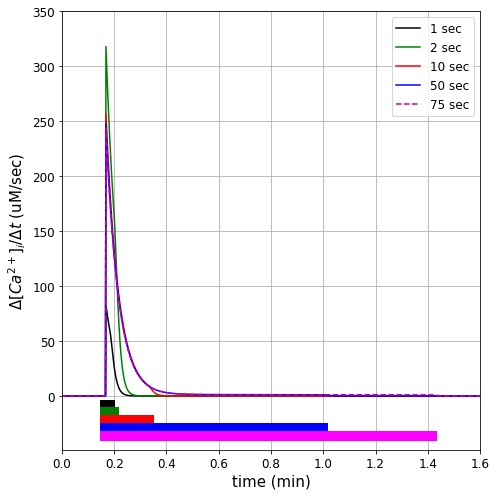

In [138]:
iters1 = np.arange(20)
interval = 1000
st1 = 1
st2 = 2
st10 = 10
st50 = 50
st75 = 75
ATP1 = []
ATP2 = []
ATP10 = []
ATP50 = []
ATP75 = []
timeATP1 = []
timeATP2 = []
timeATP10 = []
timeATP50 = []
timeATP75 = []
dummy = np.nan

for i in iters1:
    ti = i*interval
    tf1 = (1+i)*interval-st1
    tf2 = (1+i)*interval-st2
    tf10 = (1+i)*interval-st10
    tf50 = (1+i)*interval-st50
    tf75 = (1+i)*interval-st75
    trs1 = scipy.linspace(ti,tf1,(interval*1))
    trs2 = scipy.linspace(ti,tf2,(interval*1))
    trs10 = scipy.linspace(ti,tf10,(interval*1))
    trs50 = scipy.linspace(ti,tf50,(interval*1))
    trs75 = scipy.linspace(ti,tf75,(interval*1))
    iters21 = np.arange(np.shape(trs1)[0])
    iters22 = np.arange(np.shape(trs2)[0])
    iters210 = np.arange(np.shape(trs10)[0])
    iters250 = np.arange(np.shape(trs50)[0])
    iters275 = np.arange(np.shape(trs75)[0])
    
    for j1 in iters21:
        ATP1 = np.append(ATP1,dummy)
    for j2 in iters22:
        ATP2 = np.append(ATP2,dummy)
    for j10 in iters210:
        ATP10 = np.append(ATP10,dummy)
    for j50 in iters250:
        ATP50 = np.append(ATP50,dummy)
    for j75 in iters275:
        ATP75 = np.append(ATP75,dummy)
        
    tst1=scipy.linspace(tf1,(tf1+st1),(st1*10))
    tst2=scipy.linspace(tf2,(tf2+st2),(st2))
    tst10=scipy.linspace(tf10,(tf10+st10),(st10))
    tst50=scipy.linspace(tf50,(tf50+st50),(st50))
    tst75=scipy.linspace(tf75,(tf75+st75),(st75))
    
    iters31 = np.arange(np.shape(tst1)[0])
    iters32 = np.arange(np.shape(tst2)[0])
    iters310 = np.arange(np.shape(tst10)[0])
    iters350 = np.arange(np.shape(tst50)[0])
    iters375 = np.arange(np.shape(tst75)[0])
    
    for k1 in iters31:
        ATP1 = np.append(ATP1,-8)
    for k2 in iters32:
        ATP2 = np.append(ATP2,-15)
    for k10 in iters310:
        ATP10 = np.append(ATP10,-22)
    for k50 in iters350:
        ATP50 = np.append(ATP50,-29)
    for k75 in iters375:
        ATP75 = np.append(ATP75,-36)
        
    timeATP1 = np.append(timeATP1,trs1)
    timeATP1 = np.append(timeATP1,tst1)
    timeATP2 = np.append(timeATP2,trs2)
    timeATP2 = np.append(timeATP2,tst2)
    timeATP10 = np.append(timeATP10,trs10)
    timeATP10 = np.append(timeATP10,tst10)
    timeATP50 = np.append(timeATP50,trs50)
    timeATP50 = np.append(timeATP50,tst50)
    timeATP75 = np.append(timeATP75,trs75)
    timeATP75 = np.append(timeATP75,tst75)
    

t_new3 = 18990
t_end3 = 19250
plt.figure(figsize = (7,7))
plt.tick_params(labelsize=12)
plt.plot((time9+1-t_new3)/60,Jp2x49*10**6,'k-',label="1 sec")
plt.plot((time14+2-t_new3)/60,Jp2x44*10**6,'g-',label="2 sec")
plt.plot((time15+10-t_new3)/60,Jp2x45*10**6,'r-',label="10 sec")
plt.plot((time16+50-t_new3)/60,Jp2x46*10**6,'b-',label="50 sec")
plt.plot((time17+75-t_new3)/60,Jp2x47*10**6,'m--',label="75 sec")
plt.plot((timeATP1+1-t_new3)/60,ATP1,'black',linewidth=10)
plt.plot((timeATP2+2-t_new3)/60,ATP2,'green',linewidth=10)
plt.plot((timeATP10+10-t_new3)/60,ATP10,'red',linewidth=10)
plt.plot((timeATP50+50-t_new3)/60,ATP50,'blue',linewidth=10)
plt.plot((timeATP75+75-t_new3)/60,ATP75,'magenta',linewidth=10)
plt.xlabel("time (min)",fontsize=15)
plt.ylabel("$\Delta[Ca^{2+}]_{i}/\Delta t$ (uM/sec)",fontsize=15)
plt.legend(loc=0,fontsize=12)
plt.xlim(0,1.6)
plt.ylim(-49,350)
plt.tight_layout()
plt.grid(True)
plt.savefig('durationvsCaprofilep2x4.png')

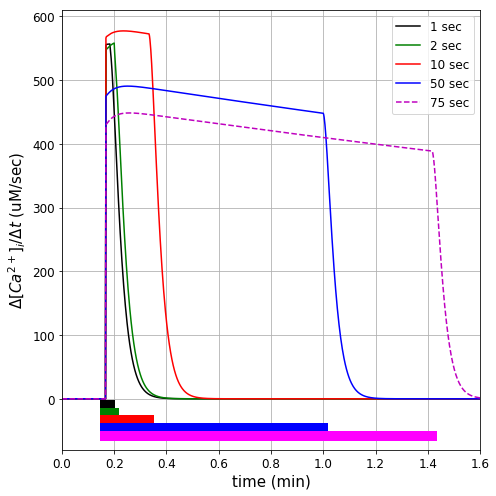

In [137]:
iters1 = np.arange(20)
interval = 1000
st1 = 1
st2 = 2
st10 = 10
st50 = 50
st75 = 75
ATP1 = []
ATP2 = []
ATP10 = []
ATP50 = []
ATP75 = []
timeATP1 = []
timeATP2 = []
timeATP10 = []
timeATP50 = []
timeATP75 = []
dummy = np.nan

for i in iters1:
    ti = i*interval
    tf1 = (1+i)*interval-st1
    tf2 = (1+i)*interval-st2
    tf10 = (1+i)*interval-st10
    tf50 = (1+i)*interval-st50
    tf75 = (1+i)*interval-st75
    trs1 = scipy.linspace(ti,tf1,(interval*1))
    trs2 = scipy.linspace(ti,tf2,(interval*1))
    trs10 = scipy.linspace(ti,tf10,(interval*1))
    trs50 = scipy.linspace(ti,tf50,(interval*1))
    trs75 = scipy.linspace(ti,tf75,(interval*1))
    iters21 = np.arange(np.shape(trs1)[0])
    iters22 = np.arange(np.shape(trs2)[0])
    iters210 = np.arange(np.shape(trs10)[0])
    iters250 = np.arange(np.shape(trs50)[0])
    iters275 = np.arange(np.shape(trs75)[0])
    
    for j1 in iters21:
        ATP1 = np.append(ATP1,dummy)
    for j2 in iters22:
        ATP2 = np.append(ATP2,dummy)
    for j10 in iters210:
        ATP10 = np.append(ATP10,dummy)
    for j50 in iters250:
        ATP50 = np.append(ATP50,dummy)
    for j75 in iters275:
        ATP75 = np.append(ATP75,dummy)
        
    tst1=scipy.linspace(tf1,(tf1+st1),(st1*10))
    tst2=scipy.linspace(tf2,(tf2+st2),(st2))
    tst10=scipy.linspace(tf10,(tf10+st10),(st10))
    tst50=scipy.linspace(tf50,(tf50+st50),(st50))
    tst75=scipy.linspace(tf75,(tf75+st75),(st75))
    
    iters31 = np.arange(np.shape(tst1)[0])
    iters32 = np.arange(np.shape(tst2)[0])
    iters310 = np.arange(np.shape(tst10)[0])
    iters350 = np.arange(np.shape(tst50)[0])
    iters375 = np.arange(np.shape(tst75)[0])
    
    for k1 in iters31:
        ATP1 = np.append(ATP1,-10)
    for k2 in iters32:
        ATP2 = np.append(ATP2,-22)
    for k10 in iters310:
        ATP10 = np.append(ATP10,-34)
    for k50 in iters350:
        ATP50 = np.append(ATP50,-46)
    for k75 in iters375:
        ATP75 = np.append(ATP75,-58)
        
    timeATP1 = np.append(timeATP1,trs1)
    timeATP1 = np.append(timeATP1,tst1)
    timeATP2 = np.append(timeATP2,trs2)
    timeATP2 = np.append(timeATP2,tst2)
    timeATP10 = np.append(timeATP10,trs10)
    timeATP10 = np.append(timeATP10,tst10)
    timeATP50 = np.append(timeATP50,trs50)
    timeATP50 = np.append(timeATP50,tst50)
    timeATP75 = np.append(timeATP75,trs75)
    timeATP75 = np.append(timeATP75,tst75)
    

t_new3 = 18990
t_end3 = 19250
plt.figure(figsize = (7,7))
plt.tick_params(labelsize=12)
plt.plot((time9+1-t_new3)/60,Jp2x79*10**6,'k-',label="1 sec")
plt.plot((time14+2-t_new3)/60,Jp2x74*10**6,'g-',label="2 sec")
plt.plot((time15+10-t_new3)/60,Jp2x75*10**6,'r-',label="10 sec")
plt.plot((time16+50-t_new3)/60,Jp2x76*10**6,'b-',label="50 sec")
plt.plot((time17+75-t_new3)/60,Jp2x77*10**6,'m--',label="75 sec")
plt.plot((timeATP1+1-t_new3)/60,ATP1,'black',linewidth=10)
plt.plot((timeATP2+2-t_new3)/60,ATP2,'green',linewidth=10)
plt.plot((timeATP10+10-t_new3)/60,ATP10,'red',linewidth=10)
plt.plot((timeATP50+50-t_new3)/60,ATP50,'blue',linewidth=10)
plt.plot((timeATP75+75-t_new3)/60,ATP75,'magenta',linewidth=10)
plt.xlabel("time (min)",fontsize=15)
plt.ylabel("$\Delta[Ca^{2+}]_{i}/\Delta t$ (uM/sec)",fontsize=15)
plt.legend(loc=0,fontsize=12)
plt.xlim(0,1.6)
plt.ylim(-80,610)
plt.tight_layout()
plt.grid(True)
plt.savefig('durationvsCaprofilep2x7.png')

In [39]:
iters1 = np.arange(20)
interval = 1000
st1 = 1
st2 = 2
st10 = 10
st50 = 50
st75 = 75
ATP1 = []
ATP2 = []
ATP10 = []
ATP50 = []
ATP75 = []
timeATP1 = []
timeATP2 = []
timeATP10 = []
timeATP50 = []
timeATP75 = []
dummy = np.nan

for i in iters1:
    ti = i*interval
    tf1 = (1+i)*interval-st1
    tf2 = (1+i)*interval-st2
    tf10 = (1+i)*interval-st10
    tf50 = (1+i)*interval-st50
    tf75 = (1+i)*interval-st75
    trs1 = scipy.linspace(ti,tf1,(interval*1))
    trs2 = scipy.linspace(ti,tf2,(interval*1))
    trs10 = scipy.linspace(ti,tf10,(interval*1))
    trs50 = scipy.linspace(ti,tf50,(interval*1))
    trs75 = scipy.linspace(ti,tf75,(interval*1))
    iters21 = np.arange(np.shape(trs1)[0])
    iters22 = np.arange(np.shape(trs2)[0])
    iters210 = np.arange(np.shape(trs10)[0])
    iters250 = np.arange(np.shape(trs50)[0])
    iters275 = np.arange(np.shape(trs75)[0])
    
    for j1 in iters21:
        ATP1 = np.append(ATP1,dummy)
    for j2 in iters22:
        ATP2 = np.append(ATP2,dummy)
    for j10 in iters210:
        ATP10 = np.append(ATP10,dummy)
    for j50 in iters250:
        ATP50 = np.append(ATP50,dummy)
    for j75 in iters275:
        ATP75 = np.append(ATP75,dummy)
        
    tst1=scipy.linspace(tf1,(tf1+st1),(st1*10))
    tst2=scipy.linspace(tf2,(tf2+st2),(st2))
    tst10=scipy.linspace(tf10,(tf10+st10),(st10))
    tst50=scipy.linspace(tf50,(tf50+st50),(st50))
    tst75=scipy.linspace(tf75,(tf75+st75),(st75))
    
    iters31 = np.arange(np.shape(tst1)[0])
    iters32 = np.arange(np.shape(tst2)[0])
    iters310 = np.arange(np.shape(tst10)[0])
    iters350 = np.arange(np.shape(tst50)[0])
    iters375 = np.arange(np.shape(tst75)[0])
    
    for k1 in iters31:
        ATP1 = np.append(ATP1,-0.05)
    for k2 in iters32:
        ATP2 = np.append(ATP2,-0.10)
    for k10 in iters310:
        ATP10 = np.append(ATP10,-0.15)
    for k50 in iters350:
        ATP50 = np.append(ATP50,-0.20)
    for k75 in iters375:
        ATP75 = np.append(ATP75,-0.25)
        
    timeATP1 = np.append(timeATP1,trs1)
    timeATP1 = np.append(timeATP1,tst1)
    timeATP2 = np.append(timeATP2,trs2)
    timeATP2 = np.append(timeATP2,tst2)
    timeATP10 = np.append(timeATP10,trs10)
    timeATP10 = np.append(timeATP10,tst10)
    timeATP50 = np.append(timeATP50,trs50)
    timeATP50 = np.append(timeATP50,tst50)
    timeATP75 = np.append(timeATP75,trs75)
    timeATP75 = np.append(timeATP75,tst75)
    

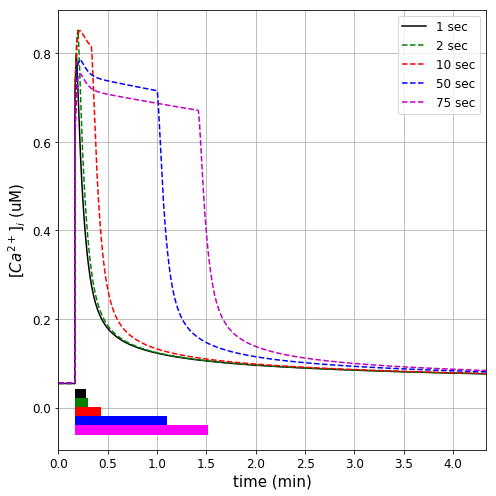

In [38]:
t_new3 = 18990
t_end3 = 19250
plt.figure(figsize = (7,7))
plt.tick_params(labelsize=12)
plt.plot((time9+1-t_new3)/60,Ca9*10**6,'k-',label="1 sec")
plt.plot((time14+2-t_new3)/60,Ca14*10**6,'g--',label="2 sec")
plt.plot((time15+10-t_new3)/60,Ca15*10**6,'r--',label="10 sec")
plt.plot((time16+50-t_new3)/60,Ca16*10**6,'b--',label="50 sec")
plt.plot((time17+75-t_new3)/60,Ca17*10**6,'m--',label="75 sec")
plt.plot((timeATP1+1+3-t_new3)/60,ATP1,'black',linewidth=10)
plt.plot((timeATP2+2+3-t_new3)/60,ATP2,'green',linewidth=10)
plt.plot((timeATP10+10+3-t_new3)/60,ATP10,'red',linewidth=10)
plt.plot((timeATP50+50+3-t_new3)/60,ATP50,'blue',linewidth=10)
plt.plot((timeATP75+75+3-t_new3)/60,ATP75,'magenta',linewidth=10)
plt.xlabel("time (min)",fontsize=15)
plt.ylabel("$[Ca^{2+}]_{i}$ (uM)",fontsize=15)
plt.legend(loc=0,fontsize=12)
plt.xlim(0,(t_end3-(t_new3))/60)
#plt.ylim(0.0,0.01)
plt.tight_layout()
plt.grid(True)
plt.savefig('durationvsCaprofile.png')

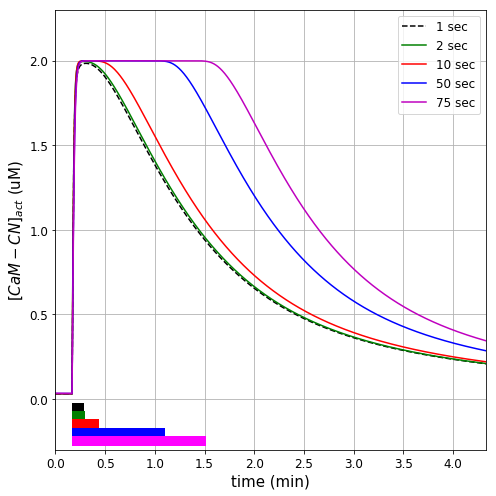

In [41]:
t_new3 = 18990
t_end3 = 19250
plt.figure(figsize = (7,7))
plt.tick_params(labelsize=12)
plt.plot((time9+1-t_new3)/60,CaMCN9*10**6,'k--',label="1 sec")
plt.plot((time14+2-t_new3)/60,CaMCN14*10**6,'g-',label="2 sec")
plt.plot((time15+10-t_new3)/60,CaMCN15*10**6,'r-',label="10 sec")
plt.plot((time16+50-t_new3)/60,CaMCN16*10**6,'b-',label="50 sec")
plt.plot((time17+75-t_new3)/60,CaMCN17*10**6,'m-',label="75 sec")
plt.plot((timeATP1+1+3-t_new3)/60,ATP1,'black',linewidth=10)
plt.plot((timeATP2+2+3-t_new3)/60,ATP2,'green',linewidth=10)
plt.plot((timeATP10+10+3-t_new3)/60,ATP10,'red',linewidth=10)
plt.plot((timeATP50+50+3-t_new3)/60,ATP50,'blue',linewidth=10)
plt.plot((timeATP75+75+3-t_new3)/60,ATP75,'magenta',linewidth=10)
plt.xlabel("time (min)",fontsize=15)
plt.ylabel("$[CaM-CN]_{act}$ (uM)",fontsize=15)
plt.legend(loc=0,fontsize=12)
plt.xlim(0,(t_end3-(t_new3))/60)
plt.ylim(-0.3,2.3)
plt.tight_layout()
plt.grid(True)
plt.savefig('durationvsCaMCNprofile.png')

In [54]:
iters1 = np.arange(20)
interval = 1000
st1 = 1
st2 = 2
st10 = 10
st50 = 50
st75 = 75
ATP1 = []
ATP2 = []
ATP10 = []
ATP50 = []
ATP75 = []
timeATP1 = []
timeATP2 = []
timeATP10 = []
timeATP50 = []
timeATP75 = []
dummy = np.nan

for i in iters1:
    ti = i*interval
    tf1 = (1+i)*interval-st1
    tf2 = (1+i)*interval-st2
    tf10 = (1+i)*interval-st10
    tf50 = (1+i)*interval-st50
    tf75 = (1+i)*interval-st75
    trs1 = scipy.linspace(ti,tf1,(interval*1))
    trs2 = scipy.linspace(ti,tf2,(interval*1))
    trs10 = scipy.linspace(ti,tf10,(interval*1))
    trs50 = scipy.linspace(ti,tf50,(interval*1))
    trs75 = scipy.linspace(ti,tf75,(interval*1))
    iters21 = np.arange(np.shape(trs1)[0])
    iters22 = np.arange(np.shape(trs2)[0])
    iters210 = np.arange(np.shape(trs10)[0])
    iters250 = np.arange(np.shape(trs50)[0])
    iters275 = np.arange(np.shape(trs75)[0])
    
    for j1 in iters21:
        ATP1 = np.append(ATP1,dummy)
    for j2 in iters22:
        ATP2 = np.append(ATP2,dummy)
    for j10 in iters210:
        ATP10 = np.append(ATP10,dummy)
    for j50 in iters250:
        ATP50 = np.append(ATP50,dummy)
    for j75 in iters275:
        ATP75 = np.append(ATP75,dummy)
        
    tst1=scipy.linspace(tf1,(tf1+st1),(st1*10))
    tst2=scipy.linspace(tf2,(tf2+st2),(st2))
    tst10=scipy.linspace(tf10,(tf10+st10),(st10))
    tst50=scipy.linspace(tf50,(tf50+st50),(st50))
    tst75=scipy.linspace(tf75,(tf75+st75),(st75))
    
    iters31 = np.arange(np.shape(tst1)[0])
    iters32 = np.arange(np.shape(tst2)[0])
    iters310 = np.arange(np.shape(tst10)[0])
    iters350 = np.arange(np.shape(tst50)[0])
    iters375 = np.arange(np.shape(tst75)[0])
    
    for k1 in iters31:
        ATP1 = np.append(ATP1,0.92)
    for k2 in iters32:
        ATP2 = np.append(ATP2,0.915)
    for k10 in iters310:
        ATP10 = np.append(ATP10,0.91)
    for k50 in iters350:
        ATP50 = np.append(ATP50,0.905)
    for k75 in iters375:
        ATP75 = np.append(ATP75,0.90)
        
    timeATP1 = np.append(timeATP1,trs1)
    timeATP1 = np.append(timeATP1,tst1)
    timeATP2 = np.append(timeATP2,trs2)
    timeATP2 = np.append(timeATP2,tst2)
    timeATP10 = np.append(timeATP10,trs10)
    timeATP10 = np.append(timeATP10,tst10)
    timeATP50 = np.append(timeATP50,trs50)
    timeATP50 = np.append(timeATP50,tst50)
    timeATP75 = np.append(timeATP75,trs75)
    timeATP75 = np.append(timeATP75,tst75)

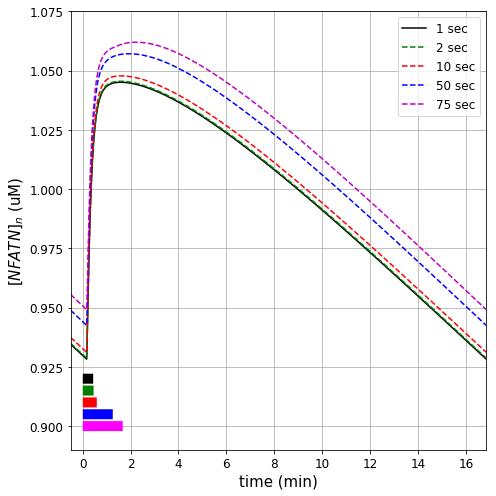

In [57]:
t_new3 = 18990
t_end3 = 19250
plt.figure(figsize = (7,7))
plt.tick_params(labelsize=12)
plt.plot((time9+1-t_new3)/60,NFATNn9,'k-',label="1 sec")
plt.plot((time14+2-t_new3)/60,NFATNn14,'g--',label="2 sec")
plt.plot((time15+10-t_new3)/60,NFATNn15,'r--',label="10 sec")
plt.plot((time16+50-t_new3)/60,NFATNn16,'b--',label="50 sec")
plt.plot((time17+75-t_new3)/60,NFATNn17,'m--',label="75 sec")
plt.plot((timeATP1+1+3-t_new3)/60,ATP1,'black',linewidth=10)
plt.plot((timeATP2+2+3-t_new3)/60,ATP2,'green',linewidth=10)
plt.plot((timeATP10+10+3-t_new3)/60,ATP10,'red',linewidth=10)
plt.plot((timeATP50+50+3-t_new3)/60,ATP50,'blue',linewidth=10)
plt.plot((timeATP75+75+3-t_new3)/60,ATP75,'magenta',linewidth=10)
plt.xlabel("time (min)",fontsize=15)
plt.ylabel("$[NFATN]_{n}$ (uM)",fontsize=15)
plt.legend(loc=0,fontsize=12)
plt.xlim(-0.5,(1010)/60)
plt.ylim(0.89,1.075)
plt.grid(True)
plt.tight_layout()
plt.savefig('durationvsNFATNnprofile.png')

In [76]:
D9 = np.array([Ca9[t_new3*10:t_end3*10],Ca2CaM9[t_new3*10:t_end3*10],
               Ca4CaM9[t_new3*10:t_end3*10],Ca4CN9[t_new3*10:t_end3*10],CaMCN9[t_new3*10:t_end3*10],
               NFATNn9[t_new3*10:t_end3*10],
               TNFa_leak9[t_new3*10:t_end3*10],TNFa_release9[t_new3*10:t_end3*10],
               TNFa_release_total9[t_new3*10:t_end3*10],time9[t_new3*10:t_end3*10]])
D14 = np.array([Ca14[t_new3*10:t_end3*10],Ca2CaM14[t_new3*10:t_end3*10],
               Ca4CaM14[t_new3*10:t_end3*10],Ca4CN14[t_new3*10:t_end3*10],CaMCN14[t_new3*10:t_end3*10],
               NFATNn14[t_new3*10:t_end3*10],
               TNFa_leak14[t_new3*10:t_end3*10],TNFa_release14[t_new3*10:t_end3*10],
               TNFa_release_total14[t_new3*10:t_end3*10],time14[t_new3*10:t_end3*10]])
D15 = np.array([Ca15[t_new3*10:t_end3*10],Ca2CaM15[t_new3*10:t_end3*10],
               Ca4CaM15[t_new3*10:t_end3*10],Ca4CN15[t_new3*10:t_end3*10],CaMCN15[t_new3*10:t_end3*10],
               NFATNn15[t_new3*10:t_end3*10],
               TNFa_leak15[t_new3*10:t_end3*10],TNFa_release15[t_new3*10:t_end3*10],
               TNFa_release_total15[t_new3*10:t_end3*10],time15[t_new3*10:t_end3*10]])
D16 = np.array([Ca16[t_new3*10:t_end3*10],Ca2CaM16[t_new3*10:t_end3*10],
               Ca4CaM16[t_new3*10:t_end3*10],Ca4CN16[t_new3*10:t_end3*10],CaMCN16[t_new3*10:t_end3*10],
               NFATNn16[t_new3*10:t_end3*10],
               TNFa_leak16[t_new3*10:t_end3*10],TNFa_release16[t_new3*10:t_end3*10],
               TNFa_release_total16[t_new3*10:t_end3*10],time16[t_new3*10:t_end3*10]])
D17 = np.array([Ca17[t_new2*10:t_end2*10],Ca2CaM17[t_new2*10:t_end2*10],
               Ca4CaM17[t_new2*10:t_end2*10],Ca4CN17[t_new2*10:t_end2*10],CaMCN17[t_new2*10:t_end2*10],
               NFATNn17[t_new2*10:t_end2*10],
               TNFa_leak17[t_new2*10:t_end2*10],TNFa_release17[t_new2*10:t_end2*10],
               TNFa_release_total17[t_new2*10:t_end2*10],time17[t_new2*10:t_end2*10]])
        
            
Camax = np.array([max(Ca9[t_new3*10:t_end3*10]),max(Ca14[t_new3*10:t_end3*10]),
                  max(Ca15[t_new3*10:t_end3*10]),max(Ca16[t_new3*10:t_end3*10]),
                  max(Ca17[t_new3*10:t_end3*10])])
CaMAX = max(Camax)
rCa = Camax/CaMAX*100

TNFrelTmax = np.array([max(TNFa_release_total9[t_new3*10:t_end3*10]),max(TNFa_release_total14[t_new3*10:t_end3*10]),
                       max(TNFa_release_total15[t_new3*10:t_end3*10]),max(TNFa_release_total16[t_new3*10:t_end3*10]),
                       max(TNFa_release_total17[t_new3*10:t_end3*10])])
TNFrelTMAX = max(TNFrelTmax)
rTNFrelT = TNFrelTmax/TNFrelTMAX*100

### Ca profile with various duration of stimulation within 0.001 Hz and 1.0 mM ATP

/home/AD/bch265/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


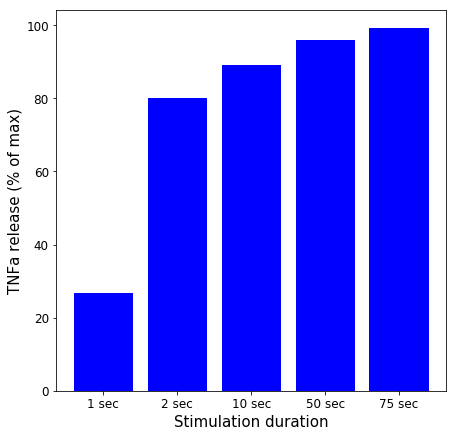

In [121]:
plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
ax = plt.subplot()
b1 = ax.bar(1,rTNFrelT[0],0.8,color="blue",alpha=1)
b2 = ax.bar(2,rTNFrelT[1],0.8,color="blue",alpha=1)
b3 = ax.bar(3,rTNFrelT[2],0.8,color="blue",alpha=1)
b4 = ax.bar(4,rTNFrelT[3],0.8,color="blue",alpha=1)
b5 = ax.bar(5,rTNFrelT[4],0.8,color="blue",alpha=1)

ax.set_ylabel("TNFa release (% of max)",fontsize=15)
ax.set_xlabel("Stimulation duration",fontsize=15)
newInd = np.array([1,2,3,4,5])
ax.set_xticks(newInd)
ax.set_xticklabels(['1 sec', '2 sec', '10 sec','50 sec','75 sec'],fontsize=12)
plt.savefig('TNFvsduration_1mM_001Hz.png')

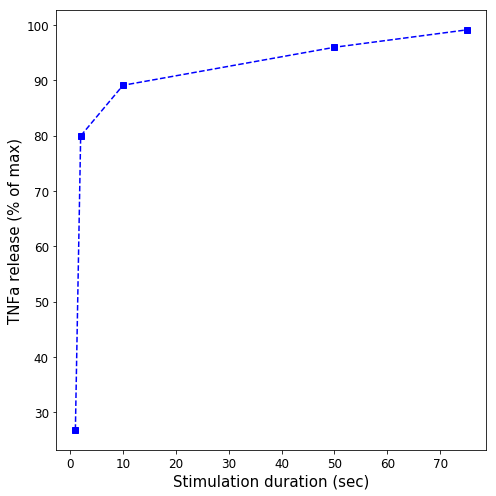

In [218]:
dura = np.array([1,2,10,50,75])
plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
plt.plot(dura,rTNFrelT[0:5],'b--s',alpha=1)
plt.ylabel("TNFa release (% of max)",fontsize=15)
plt.xlabel("Stimulation duration (sec)",fontsize=15)
plt.tight_layout()
plt.savefig('plotTNFvsduration1mM001Hz.png')

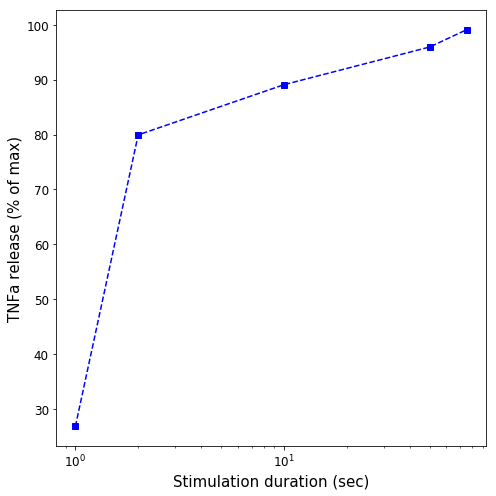

In [229]:
dura = np.array([1,2,10,50,75])
plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
plt.semilogx(dura,rTNFrelT[0:5],'b--s',alpha=1)
plt.ylabel("TNFa release (% of max)",fontsize=15)
plt.xlabel("Stimulation duration (sec)",fontsize=15)
plt.tight_layout()
plt.savefig('logTNFvsduration1mM001Hz.png')

In [ ]:
results9 = ca.total(1,200,10,100,1000)
pk.dump(results9,open("1mMATP_001Hz.p","wb"))